In [5]:
import os

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm # Displays a progress bar
import urllib.request as urlreq
from pathlib import Path
import cv2

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchsummary import summary
from torch.utils.data import Dataset, Subset, DataLoader, random_split
from torchvision import datasets, transforms, models

# Landmark Detector Preprocessing
#### The following notebook preprocesses all the images by detecting facial landmarks and appending those landmarks to the images, which are then ran through our model

In [9]:
def get_landmarks(img_name, landmark_detector):
    img = cv2.imread(img_name, cv2.IMREAD_GRAYSCALE)
    
    haarcascade_url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt2.xml"
    haarcascade = "haarcascade_frontalface_alt2.xml"
    
    if (haarcascade not in os.listdir(os.curdir)):
        urlreq.urlretrieve(haarcascade_url, haarcascade)
        print("File downloaded")

    detector = cv2.CascadeClassifier(haarcascade)
    
    faces = detector.detectMultiScale(img)
    if len(faces) == 0:
        faces = np.array([[0,0,48,48]])
        
    img = cv2.imread(img_name)
    _, landmarks = landmark_detector.fit(img, faces)

    for landmark in landmarks:
        for x,y in landmark[0]:
            cv2.circle(img, (int(x), int(y)), 0, (255, 0, 0), 1)
    
    plt.axis("off")
    print("new_images/"+(img_name).split(".")[0]+".png")
    plt.imsave("new_images/"+(img_name).split(".")[0]+".png", img)

## Loading cv2 Landmark Model

In [7]:
LBFmodel_url = "https://github.com/kurnianggoro/GSOC2017/raw/master/data/lbfmodel.yaml"
LBFmodel = "lbfmodel.yaml"

if (LBFmodel not in os.listdir(os.curdir)):
    urlreq.urlretrieve(LBFmodel_url, LBFmodel)
    
landmark_detector  = cv2.face.createFacemarkLBF()
landmark_detector.loadModel(LBFmodel)

## Train Part 1 - Mutaman

['14147.jpg', '24084.jpg', '19463.jpg', '11759.jpg', '9041.jpg', '19311.jpg', '28872.jpg', '34283.jpg', '24090.jpg', '32816.jpg', '16778.jpg', '18966.jpg', '14184.jpg', '10490.jpg', '34240.jpg', '7911.jpg', '18972.jpg', '28641.jpg', '31476.jpg', '27200.jpg', '8149.jpg', '7508.jpg', '10889.jpg', '10651.jpg', '33088.jpg', '17116.jpg', '13416.jpg', '11215.jpg', '13402.jpg', '31648.jpg', '26334.jpg', '15926.jpg', '34056.jpg', '32433.jpg', '22146.jpg', '10692.jpg', '29013.jpg', '28325.jpg', '24279.jpg', '23264.jpg', '13238.jpg', '10057.jpg', '22797.jpg', '16354.jpg', '28292.jpg', '8767.jpg', '18423.jpg', '13210.jpg', '20802.jpg', '26240.jpg', '24331.jpg', '3815.jpg', '3801.jpg', '24325.jpg', '8954.jpg', '29167.jpg', '16397.jpg', '20625.jpg', '28279.jpg', '27176.jpg', '35572.jpg', '18609.jpg', '19503.jpg', '12456.jpg', '13748.jpg', '7656.jpg', '32976.jpg', '32962.jpg', '18621.jpg', '28709.jpg', '34320.jpg', '32751.jpg', '34446.jpg', '20433.jpg', '18806.jpg', '22218.jpg', '23106.jpg', '18184.

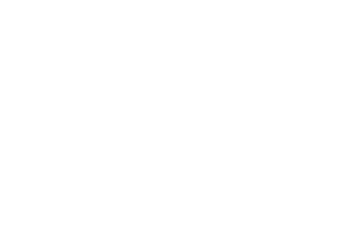

In [7]:
for name in ["angry", "fear"]:
    path = "images/train/" + name
    Path("new_images/images/train/"+name).mkdir(parents=True, exist_ok=True)
    files = os.listdir(path)
    for i in range(1, len(files)):
        filename = files[i]
        f = os.path.join(path, filename)

        get_landmarks(f, landmark_detector)

## Train Part 2 - Andrew

images/train/happy\100.jpg
new_images/images/train/happy\100.png
images/train/happy\10000.jpg
new_images/images/train/happy\10000.png
images/train/happy\10001.jpg
new_images/images/train/happy\10001.png
images/train/happy\10005.jpg
new_images/images/train/happy\10005.png
images/train/happy\10035.jpg
new_images/images/train/happy\10035.png
images/train/happy\10039.jpg
new_images/images/train/happy\10039.png
images/train/happy\1004.jpg
new_images/images/train/happy\1004.png
images/train/happy\10042.jpg
new_images/images/train/happy\10042.png
images/train/happy\10046.jpg
new_images/images/train/happy\10046.png
images/train/happy\10050.jpg
new_images/images/train/happy\10050.png
images/train/happy\1006.jpg
new_images/images/train/happy\1006.png
images/train/happy\10060.jpg
new_images/images/train/happy\10060.png
images/train/happy\10066.jpg
new_images/images/train/happy\10066.png
images/train/happy\10071.jpg
new_images/images/train/happy\10071.png
images/train/happy\10083.jpg
new_images/im

new_images/images/train/happy\1057.png
images/train/happy\10570.jpg
new_images/images/train/happy\10570.png
images/train/happy\10574.jpg
new_images/images/train/happy\10574.png
images/train/happy\10578.jpg
new_images/images/train/happy\10578.png
images/train/happy\10587.jpg
new_images/images/train/happy\10587.png
images/train/happy\10590.jpg
new_images/images/train/happy\10590.png
images/train/happy\10594.jpg
new_images/images/train/happy\10594.png
images/train/happy\10597.jpg
new_images/images/train/happy\10597.png
images/train/happy\10599.jpg
new_images/images/train/happy\10599.png
images/train/happy\10601.jpg
new_images/images/train/happy\10601.png
images/train/happy\10608.jpg
new_images/images/train/happy\10608.png
images/train/happy\10609.jpg
new_images/images/train/happy\10609.png
images/train/happy\10610.jpg
new_images/images/train/happy\10610.png
images/train/happy\10615.jpg
new_images/images/train/happy\10615.png
images/train/happy\10617.jpg
new_images/images/train/happy\10617

new_images/images/train/happy\11133.png
images/train/happy\11134.jpg
new_images/images/train/happy\11134.png
images/train/happy\11142.jpg
new_images/images/train/happy\11142.png
images/train/happy\11144.jpg
new_images/images/train/happy\11144.png
images/train/happy\11162.jpg
new_images/images/train/happy\11162.png
images/train/happy\11164.jpg
new_images/images/train/happy\11164.png
images/train/happy\11166.jpg
new_images/images/train/happy\11166.png
images/train/happy\1117.jpg
new_images/images/train/happy\1117.png
images/train/happy\11172.jpg
new_images/images/train/happy\11172.png
images/train/happy\11177.jpg
new_images/images/train/happy\11177.png
images/train/happy\11191.jpg
new_images/images/train/happy\11191.png
images/train/happy\11193.jpg
new_images/images/train/happy\11193.png
images/train/happy\11204.jpg
new_images/images/train/happy\11204.png
images/train/happy\11207.jpg
new_images/images/train/happy\11207.png
images/train/happy\11210.jpg
new_images/images/train/happy\11210.

new_images/images/train/happy\1174.png
images/train/happy\11742.jpg
new_images/images/train/happy\11742.png
images/train/happy\11743.jpg
new_images/images/train/happy\11743.png
images/train/happy\11749.jpg
new_images/images/train/happy\11749.png
images/train/happy\11750.jpg
new_images/images/train/happy\11750.png
images/train/happy\11751.jpg
new_images/images/train/happy\11751.png
images/train/happy\11761.jpg
new_images/images/train/happy\11761.png
images/train/happy\11768.jpg
new_images/images/train/happy\11768.png
images/train/happy\11775.jpg
new_images/images/train/happy\11775.png
images/train/happy\11776.jpg
new_images/images/train/happy\11776.png
images/train/happy\11791.jpg
new_images/images/train/happy\11791.png
images/train/happy\11795.jpg
new_images/images/train/happy\11795.png
images/train/happy\11797.jpg
new_images/images/train/happy\11797.png
images/train/happy\11799.jpg
new_images/images/train/happy\11799.png
images/train/happy\118.jpg
new_images/images/train/happy\118.png

new_images/images/train/happy\12297.png
images/train/happy\12306.jpg
new_images/images/train/happy\12306.png
images/train/happy\12311.jpg
new_images/images/train/happy\12311.png
images/train/happy\12317.jpg
new_images/images/train/happy\12317.png
images/train/happy\12323.jpg
new_images/images/train/happy\12323.png
images/train/happy\12327.jpg
new_images/images/train/happy\12327.png
images/train/happy\12332.jpg
new_images/images/train/happy\12332.png
images/train/happy\12335.jpg
new_images/images/train/happy\12335.png
images/train/happy\12337.jpg
new_images/images/train/happy\12337.png
images/train/happy\12343.jpg
new_images/images/train/happy\12343.png
images/train/happy\12344.jpg
new_images/images/train/happy\12344.png
images/train/happy\12346.jpg
new_images/images/train/happy\12346.png
images/train/happy\12351.jpg
new_images/images/train/happy\12351.png
images/train/happy\12356.jpg
new_images/images/train/happy\12356.png
images/train/happy\1237.jpg
new_images/images/train/happy\1237.

new_images/images/train/happy\12830.png
images/train/happy\12833.jpg
new_images/images/train/happy\12833.png
images/train/happy\12839.jpg
new_images/images/train/happy\12839.png
images/train/happy\12845.jpg
new_images/images/train/happy\12845.png
images/train/happy\1285.jpg
new_images/images/train/happy\1285.png
images/train/happy\12857.jpg
new_images/images/train/happy\12857.png
images/train/happy\12859.jpg
new_images/images/train/happy\12859.png
images/train/happy\12871.jpg
new_images/images/train/happy\12871.png
images/train/happy\1288.jpg
new_images/images/train/happy\1288.png
images/train/happy\12881.jpg
new_images/images/train/happy\12881.png
images/train/happy\12884.jpg
new_images/images/train/happy\12884.png
images/train/happy\12886.jpg
new_images/images/train/happy\12886.png
images/train/happy\12887.jpg
new_images/images/train/happy\12887.png
images/train/happy\12892.jpg
new_images/images/train/happy\12892.png
images/train/happy\12893.jpg
new_images/images/train/happy\12893.pn

new_images/images/train/happy\13459.png
images/train/happy\13461.jpg
new_images/images/train/happy\13461.png
images/train/happy\13468.jpg
new_images/images/train/happy\13468.png
images/train/happy\13469.jpg
new_images/images/train/happy\13469.png
images/train/happy\13473.jpg
new_images/images/train/happy\13473.png
images/train/happy\13475.jpg
new_images/images/train/happy\13475.png
images/train/happy\13480.jpg
new_images/images/train/happy\13480.png
images/train/happy\13485.jpg
new_images/images/train/happy\13485.png
images/train/happy\13492.jpg
new_images/images/train/happy\13492.png
images/train/happy\13496.jpg
new_images/images/train/happy\13496.png
images/train/happy\13504.jpg
new_images/images/train/happy\13504.png
images/train/happy\13509.jpg
new_images/images/train/happy\13509.png
images/train/happy\13512.jpg
new_images/images/train/happy\13512.png
images/train/happy\13515.jpg
new_images/images/train/happy\13515.png
images/train/happy\13516.jpg
new_images/images/train/happy\1351

new_images/images/train/happy\13990.png
images/train/happy\13995.jpg
new_images/images/train/happy\13995.png
images/train/happy\13996.jpg
new_images/images/train/happy\13996.png
images/train/happy\13998.jpg
new_images/images/train/happy\13998.png
images/train/happy\14.jpg
new_images/images/train/happy\14.png
images/train/happy\14006.jpg
new_images/images/train/happy\14006.png
images/train/happy\14017.jpg
new_images/images/train/happy\14017.png
images/train/happy\14020.jpg
new_images/images/train/happy\14020.png
images/train/happy\14024.jpg
new_images/images/train/happy\14024.png
images/train/happy\14025.jpg
new_images/images/train/happy\14025.png
images/train/happy\14027.jpg
new_images/images/train/happy\14027.png
images/train/happy\14031.jpg
new_images/images/train/happy\14031.png
images/train/happy\14038.jpg
new_images/images/train/happy\14038.png
images/train/happy\14039.jpg
new_images/images/train/happy\14039.png
images/train/happy\1404.jpg
new_images/images/train/happy\1404.png
im

new_images/images/train/happy\14485.png
images/train/happy\14486.jpg
new_images/images/train/happy\14486.png
images/train/happy\14490.jpg
new_images/images/train/happy\14490.png
images/train/happy\14491.jpg
new_images/images/train/happy\14491.png
images/train/happy\14492.jpg
new_images/images/train/happy\14492.png
images/train/happy\145.jpg
new_images/images/train/happy\145.png
images/train/happy\14504.jpg
new_images/images/train/happy\14504.png
images/train/happy\14506.jpg
new_images/images/train/happy\14506.png
images/train/happy\14508.jpg
new_images/images/train/happy\14508.png
images/train/happy\14510.jpg
new_images/images/train/happy\14510.png
images/train/happy\14514.jpg
new_images/images/train/happy\14514.png
images/train/happy\14530.jpg
new_images/images/train/happy\14530.png
images/train/happy\14537.jpg
new_images/images/train/happy\14537.png
images/train/happy\14538.jpg
new_images/images/train/happy\14538.png
images/train/happy\14539.jpg
new_images/images/train/happy\14539.pn

new_images/images/train/happy\14969.png
images/train/happy\1497.jpg
new_images/images/train/happy\1497.png
images/train/happy\14970.jpg
new_images/images/train/happy\14970.png
images/train/happy\14972.jpg
new_images/images/train/happy\14972.png
images/train/happy\14974.jpg
new_images/images/train/happy\14974.png
images/train/happy\14988.jpg
new_images/images/train/happy\14988.png
images/train/happy\1499.jpg
new_images/images/train/happy\1499.png
images/train/happy\14990.jpg
new_images/images/train/happy\14990.png
images/train/happy\14991.jpg
new_images/images/train/happy\14991.png
images/train/happy\14994.jpg
new_images/images/train/happy\14994.png
images/train/happy\14995.jpg
new_images/images/train/happy\14995.png
images/train/happy\14996.jpg
new_images/images/train/happy\14996.png
images/train/happy\14997.jpg
new_images/images/train/happy\14997.png
images/train/happy\15018.jpg
new_images/images/train/happy\15018.png
images/train/happy\1502.jpg
new_images/images/train/happy\1502.png


new_images/images/train/happy\15466.png
images/train/happy\1547.jpg
new_images/images/train/happy\1547.png
images/train/happy\15475.jpg
new_images/images/train/happy\15475.png
images/train/happy\15476.jpg
new_images/images/train/happy\15476.png
images/train/happy\15477.jpg
new_images/images/train/happy\15477.png
images/train/happy\1548.jpg
new_images/images/train/happy\1548.png
images/train/happy\15495.jpg
new_images/images/train/happy\15495.png
images/train/happy\15497.jpg
new_images/images/train/happy\15497.png
images/train/happy\15498.jpg
new_images/images/train/happy\15498.png
images/train/happy\1550.jpg
new_images/images/train/happy\1550.png
images/train/happy\15504.jpg
new_images/images/train/happy\15504.png
images/train/happy\15506.jpg
new_images/images/train/happy\15506.png
images/train/happy\15507.jpg
new_images/images/train/happy\15507.png
images/train/happy\15508.jpg
new_images/images/train/happy\15508.png
images/train/happy\15510.jpg
new_images/images/train/happy\15510.png


new_images/images/train/happy\15948.png
images/train/happy\15958.jpg
new_images/images/train/happy\15958.png
images/train/happy\15968.jpg
new_images/images/train/happy\15968.png
images/train/happy\15972.jpg
new_images/images/train/happy\15972.png
images/train/happy\15992.jpg
new_images/images/train/happy\15992.png
images/train/happy\15993.jpg
new_images/images/train/happy\15993.png
images/train/happy\15995.jpg
new_images/images/train/happy\15995.png
images/train/happy\16.jpg
new_images/images/train/happy\16.png
images/train/happy\1600.jpg
new_images/images/train/happy\1600.png
images/train/happy\16001.jpg
new_images/images/train/happy\16001.png
images/train/happy\16004.jpg
new_images/images/train/happy\16004.png
images/train/happy\16007.jpg
new_images/images/train/happy\16007.png
images/train/happy\16008.jpg
new_images/images/train/happy\16008.png
images/train/happy\16015.jpg
new_images/images/train/happy\16015.png
images/train/happy\16025.jpg
new_images/images/train/happy\16025.png
im

new_images/images/train/happy\16542.png
images/train/happy\16546.jpg
new_images/images/train/happy\16546.png
images/train/happy\1655.jpg
new_images/images/train/happy\1655.png
images/train/happy\16551.jpg
new_images/images/train/happy\16551.png
images/train/happy\16552.jpg
new_images/images/train/happy\16552.png
images/train/happy\16561.jpg
new_images/images/train/happy\16561.png
images/train/happy\16563.jpg
new_images/images/train/happy\16563.png
images/train/happy\16567.jpg
new_images/images/train/happy\16567.png
images/train/happy\16573.jpg
new_images/images/train/happy\16573.png
images/train/happy\16581.jpg
new_images/images/train/happy\16581.png
images/train/happy\16595.jpg
new_images/images/train/happy\16595.png
images/train/happy\16597.jpg
new_images/images/train/happy\16597.png
images/train/happy\16614.jpg
new_images/images/train/happy\16614.png
images/train/happy\16615.jpg
new_images/images/train/happy\16615.png
images/train/happy\1662.jpg
new_images/images/train/happy\1662.pn

images/train/happy\1708.jpg
new_images/images/train/happy\1708.png
images/train/happy\17080.jpg
new_images/images/train/happy\17080.png
images/train/happy\17086.jpg
new_images/images/train/happy\17086.png
images/train/happy\17089.jpg
new_images/images/train/happy\17089.png
images/train/happy\17093.jpg
new_images/images/train/happy\17093.png
images/train/happy\17115.jpg
new_images/images/train/happy\17115.png
images/train/happy\17122.jpg
new_images/images/train/happy\17122.png
images/train/happy\17125.jpg
new_images/images/train/happy\17125.png
images/train/happy\17126.jpg
new_images/images/train/happy\17126.png
images/train/happy\17141.jpg
new_images/images/train/happy\17141.png
images/train/happy\17142.jpg
new_images/images/train/happy\17142.png
images/train/happy\17144.jpg
new_images/images/train/happy\17144.png
images/train/happy\17145.jpg
new_images/images/train/happy\17145.png
images/train/happy\17147.jpg
new_images/images/train/happy\17147.png
images/train/happy\17150.jpg
new_ima

new_images/images/train/happy\17683.png
images/train/happy\17687.jpg
new_images/images/train/happy\17687.png
images/train/happy\17689.jpg
new_images/images/train/happy\17689.png
images/train/happy\17690.jpg
new_images/images/train/happy\17690.png
images/train/happy\17704.jpg
new_images/images/train/happy\17704.png
images/train/happy\17711.jpg
new_images/images/train/happy\17711.png
images/train/happy\17718.jpg
new_images/images/train/happy\17718.png
images/train/happy\17720.jpg
new_images/images/train/happy\17720.png
images/train/happy\17722.jpg
new_images/images/train/happy\17722.png
images/train/happy\17725.jpg
new_images/images/train/happy\17725.png
images/train/happy\17728.jpg
new_images/images/train/happy\17728.png
images/train/happy\1773.jpg
new_images/images/train/happy\1773.png
images/train/happy\17740.jpg
new_images/images/train/happy\17740.png
images/train/happy\17741.jpg
new_images/images/train/happy\17741.png
images/train/happy\17743.jpg
new_images/images/train/happy\17743.

new_images/images/train/happy\18211.png
images/train/happy\18212.jpg
new_images/images/train/happy\18212.png
images/train/happy\18213.jpg
new_images/images/train/happy\18213.png
images/train/happy\18216.jpg
new_images/images/train/happy\18216.png
images/train/happy\18220.jpg
new_images/images/train/happy\18220.png
images/train/happy\18222.jpg
new_images/images/train/happy\18222.png
images/train/happy\18224.jpg
new_images/images/train/happy\18224.png
images/train/happy\18225.jpg
new_images/images/train/happy\18225.png
images/train/happy\18227.jpg
new_images/images/train/happy\18227.png
images/train/happy\18231.jpg
new_images/images/train/happy\18231.png
images/train/happy\18238.jpg
new_images/images/train/happy\18238.png
images/train/happy\18243.jpg
new_images/images/train/happy\18243.png
images/train/happy\18244.jpg
new_images/images/train/happy\18244.png
images/train/happy\18246.jpg
new_images/images/train/happy\18246.png
images/train/happy\18248.jpg
new_images/images/train/happy\1824

new_images/images/train/happy\18756.png
images/train/happy\18759.jpg
new_images/images/train/happy\18759.png
images/train/happy\18767.jpg
new_images/images/train/happy\18767.png
images/train/happy\18776.jpg
new_images/images/train/happy\18776.png
images/train/happy\18782.jpg
new_images/images/train/happy\18782.png
images/train/happy\18786.jpg
new_images/images/train/happy\18786.png
images/train/happy\18792.jpg
new_images/images/train/happy\18792.png
images/train/happy\18793.jpg
new_images/images/train/happy\18793.png
images/train/happy\18796.jpg
new_images/images/train/happy\18796.png
images/train/happy\18809.jpg
new_images/images/train/happy\18809.png
images/train/happy\1881.jpg
new_images/images/train/happy\1881.png
images/train/happy\18815.jpg
new_images/images/train/happy\18815.png
images/train/happy\18826.jpg
new_images/images/train/happy\18826.png
images/train/happy\18831.jpg
new_images/images/train/happy\18831.png
images/train/happy\18843.jpg
new_images/images/train/happy\18843.

new_images/images/train/happy\19295.png
images/train/happy\19300.jpg
new_images/images/train/happy\19300.png
images/train/happy\19301.jpg
new_images/images/train/happy\19301.png
images/train/happy\19308.jpg
new_images/images/train/happy\19308.png
images/train/happy\1932.jpg
new_images/images/train/happy\1932.png
images/train/happy\19320.jpg
new_images/images/train/happy\19320.png
images/train/happy\19330.jpg
new_images/images/train/happy\19330.png
images/train/happy\19332.jpg
new_images/images/train/happy\19332.png
images/train/happy\19336.jpg
new_images/images/train/happy\19336.png
images/train/happy\19339.jpg
new_images/images/train/happy\19339.png
images/train/happy\1934.jpg
new_images/images/train/happy\1934.png
images/train/happy\19343.jpg
new_images/images/train/happy\19343.png
images/train/happy\19350.jpg
new_images/images/train/happy\19350.png
images/train/happy\19352.jpg
new_images/images/train/happy\19352.png
images/train/happy\1936.jpg
new_images/images/train/happy\1936.png


new_images/images/train/happy\19869.png
images/train/happy\19870.jpg
new_images/images/train/happy\19870.png
images/train/happy\19875.jpg
new_images/images/train/happy\19875.png
images/train/happy\19878.jpg
new_images/images/train/happy\19878.png
images/train/happy\19881.jpg
new_images/images/train/happy\19881.png
images/train/happy\19885.jpg
new_images/images/train/happy\19885.png
images/train/happy\19892.jpg
new_images/images/train/happy\19892.png
images/train/happy\19894.jpg
new_images/images/train/happy\19894.png
images/train/happy\19899.jpg
new_images/images/train/happy\19899.png
images/train/happy\19902.jpg
new_images/images/train/happy\19902.png
images/train/happy\19910.jpg
new_images/images/train/happy\19910.png
images/train/happy\19913.jpg
new_images/images/train/happy\19913.png
images/train/happy\19914.jpg
new_images/images/train/happy\19914.png
images/train/happy\19919.jpg
new_images/images/train/happy\19919.png
images/train/happy\19927.jpg
new_images/images/train/happy\1992

new_images/images/train/happy\20399.png
images/train/happy\2040.jpg
new_images/images/train/happy\2040.png
images/train/happy\20401.jpg
new_images/images/train/happy\20401.png
images/train/happy\20414.jpg
new_images/images/train/happy\20414.png
images/train/happy\20415.jpg
new_images/images/train/happy\20415.png
images/train/happy\20417.jpg
new_images/images/train/happy\20417.png
images/train/happy\20418.jpg
new_images/images/train/happy\20418.png
images/train/happy\20422.jpg
new_images/images/train/happy\20422.png
images/train/happy\20428.jpg
new_images/images/train/happy\20428.png
images/train/happy\20435.jpg
new_images/images/train/happy\20435.png
images/train/happy\2045.jpg
new_images/images/train/happy\2045.png
images/train/happy\20457.jpg
new_images/images/train/happy\20457.png
images/train/happy\20460.jpg
new_images/images/train/happy\20460.png
images/train/happy\20465.jpg
new_images/images/train/happy\20465.png
images/train/happy\20479.jpg
new_images/images/train/happy\20479.pn

new_images/images/train/happy\20973.png
images/train/happy\20975.jpg
new_images/images/train/happy\20975.png
images/train/happy\21007.jpg
new_images/images/train/happy\21007.png
images/train/happy\21015.jpg
new_images/images/train/happy\21015.png
images/train/happy\21019.jpg
new_images/images/train/happy\21019.png
images/train/happy\21024.jpg
new_images/images/train/happy\21024.png
images/train/happy\21039.jpg
new_images/images/train/happy\21039.png
images/train/happy\21042.jpg
new_images/images/train/happy\21042.png
images/train/happy\21048.jpg
new_images/images/train/happy\21048.png
images/train/happy\21049.jpg
new_images/images/train/happy\21049.png
images/train/happy\21053.jpg
new_images/images/train/happy\21053.png
images/train/happy\21055.jpg
new_images/images/train/happy\21055.png
images/train/happy\21058.jpg
new_images/images/train/happy\21058.png
images/train/happy\21080.jpg
new_images/images/train/happy\21080.png
images/train/happy\21083.jpg
new_images/images/train/happy\2108

new_images/images/train/happy\21514.png
images/train/happy\21518.jpg
new_images/images/train/happy\21518.png
images/train/happy\21521.jpg
new_images/images/train/happy\21521.png
images/train/happy\21527.jpg
new_images/images/train/happy\21527.png
images/train/happy\21529.jpg
new_images/images/train/happy\21529.png
images/train/happy\21534.jpg
new_images/images/train/happy\21534.png
images/train/happy\21542.jpg
new_images/images/train/happy\21542.png
images/train/happy\21543.jpg
new_images/images/train/happy\21543.png
images/train/happy\21548.jpg
new_images/images/train/happy\21548.png
images/train/happy\21560.jpg
new_images/images/train/happy\21560.png
images/train/happy\21561.jpg
new_images/images/train/happy\21561.png
images/train/happy\21562.jpg
new_images/images/train/happy\21562.png
images/train/happy\21563.jpg
new_images/images/train/happy\21563.png
images/train/happy\21579.jpg
new_images/images/train/happy\21579.png
images/train/happy\21582.jpg
new_images/images/train/happy\2158

new_images/images/train/happy\22110.png
images/train/happy\22112.jpg
new_images/images/train/happy\22112.png
images/train/happy\22114.jpg
new_images/images/train/happy\22114.png
images/train/happy\22115.jpg
new_images/images/train/happy\22115.png
images/train/happy\22119.jpg
new_images/images/train/happy\22119.png
images/train/happy\22120.jpg
new_images/images/train/happy\22120.png
images/train/happy\2213.jpg
new_images/images/train/happy\2213.png
images/train/happy\22133.jpg
new_images/images/train/happy\22133.png
images/train/happy\22134.jpg
new_images/images/train/happy\22134.png
images/train/happy\22139.jpg
new_images/images/train/happy\22139.png
images/train/happy\22142.jpg
new_images/images/train/happy\22142.png
images/train/happy\22152.jpg
new_images/images/train/happy\22152.png
images/train/happy\22160.jpg
new_images/images/train/happy\22160.png
images/train/happy\22168.jpg
new_images/images/train/happy\22168.png
images/train/happy\22172.jpg
new_images/images/train/happy\22172.

new_images/images/train/happy\22687.png
images/train/happy\22692.jpg
new_images/images/train/happy\22692.png
images/train/happy\22693.jpg
new_images/images/train/happy\22693.png
images/train/happy\22700.jpg
new_images/images/train/happy\22700.png
images/train/happy\22701.jpg
new_images/images/train/happy\22701.png
images/train/happy\22710.jpg
new_images/images/train/happy\22710.png
images/train/happy\22714.jpg
new_images/images/train/happy\22714.png
images/train/happy\2272.jpg
new_images/images/train/happy\2272.png
images/train/happy\22722.jpg
new_images/images/train/happy\22722.png
images/train/happy\22723.jpg
new_images/images/train/happy\22723.png
images/train/happy\22726.jpg
new_images/images/train/happy\22726.png
images/train/happy\22736.jpg
new_images/images/train/happy\22736.png
images/train/happy\22737.jpg
new_images/images/train/happy\22737.png
images/train/happy\22738.jpg
new_images/images/train/happy\22738.png
images/train/happy\22747.jpg
new_images/images/train/happy\22747.

new_images/images/train/happy\23210.png
images/train/happy\23229.jpg
new_images/images/train/happy\23229.png
images/train/happy\2323.jpg
new_images/images/train/happy\2323.png
images/train/happy\23231.jpg
new_images/images/train/happy\23231.png
images/train/happy\23234.jpg
new_images/images/train/happy\23234.png
images/train/happy\23241.jpg
new_images/images/train/happy\23241.png
images/train/happy\23242.jpg
new_images/images/train/happy\23242.png
images/train/happy\23245.jpg
new_images/images/train/happy\23245.png
images/train/happy\23248.jpg
new_images/images/train/happy\23248.png
images/train/happy\23249.jpg
new_images/images/train/happy\23249.png
images/train/happy\23251.jpg
new_images/images/train/happy\23251.png
images/train/happy\23252.jpg
new_images/images/train/happy\23252.png
images/train/happy\2326.jpg
new_images/images/train/happy\2326.png
images/train/happy\23263.jpg
new_images/images/train/happy\23263.png
images/train/happy\23266.jpg
new_images/images/train/happy\23266.pn

new_images/images/train/happy\23730.png
images/train/happy\23736.jpg
new_images/images/train/happy\23736.png
images/train/happy\23763.jpg
new_images/images/train/happy\23763.png
images/train/happy\23769.jpg
new_images/images/train/happy\23769.png
images/train/happy\23776.jpg
new_images/images/train/happy\23776.png
images/train/happy\23782.jpg
new_images/images/train/happy\23782.png
images/train/happy\23787.jpg
new_images/images/train/happy\23787.png
images/train/happy\23788.jpg
new_images/images/train/happy\23788.png
images/train/happy\23789.jpg
new_images/images/train/happy\23789.png
images/train/happy\23799.jpg
new_images/images/train/happy\23799.png
images/train/happy\23800.jpg
new_images/images/train/happy\23800.png
images/train/happy\23802.jpg
new_images/images/train/happy\23802.png
images/train/happy\23803.jpg
new_images/images/train/happy\23803.png
images/train/happy\23804.jpg
new_images/images/train/happy\23804.png
images/train/happy\23805.jpg
new_images/images/train/happy\2380

new_images/images/train/happy\24306.png
images/train/happy\24312.jpg
new_images/images/train/happy\24312.png
images/train/happy\24315.jpg
new_images/images/train/happy\24315.png
images/train/happy\24317.jpg
new_images/images/train/happy\24317.png
images/train/happy\2432.jpg
new_images/images/train/happy\2432.png
images/train/happy\24322.jpg
new_images/images/train/happy\24322.png
images/train/happy\24324.jpg
new_images/images/train/happy\24324.png
images/train/happy\24343.jpg
new_images/images/train/happy\24343.png
images/train/happy\24346.jpg
new_images/images/train/happy\24346.png
images/train/happy\2435.jpg
new_images/images/train/happy\2435.png
images/train/happy\24353.jpg
new_images/images/train/happy\24353.png
images/train/happy\24356.jpg
new_images/images/train/happy\24356.png
images/train/happy\24364.jpg
new_images/images/train/happy\24364.png
images/train/happy\24367.jpg
new_images/images/train/happy\24367.png
images/train/happy\2437.jpg
new_images/images/train/happy\2437.png


new_images/images/train/happy\24843.png
images/train/happy\24859.jpg
new_images/images/train/happy\24859.png
images/train/happy\24861.jpg
new_images/images/train/happy\24861.png
images/train/happy\24862.jpg
new_images/images/train/happy\24862.png
images/train/happy\24864.jpg
new_images/images/train/happy\24864.png
images/train/happy\24867.jpg
new_images/images/train/happy\24867.png
images/train/happy\24872.jpg
new_images/images/train/happy\24872.png
images/train/happy\24874.jpg
new_images/images/train/happy\24874.png
images/train/happy\24875.jpg
new_images/images/train/happy\24875.png
images/train/happy\24876.jpg
new_images/images/train/happy\24876.png
images/train/happy\24888.jpg
new_images/images/train/happy\24888.png
images/train/happy\24889.jpg
new_images/images/train/happy\24889.png
images/train/happy\24891.jpg
new_images/images/train/happy\24891.png
images/train/happy\2490.jpg
new_images/images/train/happy\2490.png
images/train/happy\24900.jpg
new_images/images/train/happy\24900.

new_images/images/train/happy\254.png
images/train/happy\25408.jpg
new_images/images/train/happy\25408.png
images/train/happy\2541.jpg
new_images/images/train/happy\2541.png
images/train/happy\25413.jpg
new_images/images/train/happy\25413.png
images/train/happy\25417.jpg
new_images/images/train/happy\25417.png
images/train/happy\25428.jpg
new_images/images/train/happy\25428.png
images/train/happy\25429.jpg
new_images/images/train/happy\25429.png
images/train/happy\2543.jpg
new_images/images/train/happy\2543.png
images/train/happy\25436.jpg
new_images/images/train/happy\25436.png
images/train/happy\25440.jpg
new_images/images/train/happy\25440.png
images/train/happy\25445.jpg
new_images/images/train/happy\25445.png
images/train/happy\25446.jpg
new_images/images/train/happy\25446.png
images/train/happy\25452.jpg
new_images/images/train/happy\25452.png
images/train/happy\25453.jpg
new_images/images/train/happy\25453.png
images/train/happy\25455.jpg
new_images/images/train/happy\25455.png


new_images/images/train/happy\25996.png
images/train/happy\26007.jpg
new_images/images/train/happy\26007.png
images/train/happy\26011.jpg
new_images/images/train/happy\26011.png
images/train/happy\26015.jpg
new_images/images/train/happy\26015.png
images/train/happy\26026.jpg
new_images/images/train/happy\26026.png
images/train/happy\26027.jpg
new_images/images/train/happy\26027.png
images/train/happy\26031.jpg
new_images/images/train/happy\26031.png
images/train/happy\26033.jpg
new_images/images/train/happy\26033.png
images/train/happy\2604.jpg
new_images/images/train/happy\2604.png
images/train/happy\26050.jpg
new_images/images/train/happy\26050.png
images/train/happy\26055.jpg
new_images/images/train/happy\26055.png
images/train/happy\26057.jpg
new_images/images/train/happy\26057.png
images/train/happy\2606.jpg
new_images/images/train/happy\2606.png
images/train/happy\26060.jpg
new_images/images/train/happy\26060.png
images/train/happy\26061.jpg
new_images/images/train/happy\26061.pn

new_images/images/train/happy\26593.png
images/train/happy\26598.jpg
new_images/images/train/happy\26598.png
images/train/happy\26601.jpg
new_images/images/train/happy\26601.png
images/train/happy\26604.jpg
new_images/images/train/happy\26604.png
images/train/happy\26608.jpg
new_images/images/train/happy\26608.png
images/train/happy\26609.jpg
new_images/images/train/happy\26609.png
images/train/happy\26611.jpg
new_images/images/train/happy\26611.png
images/train/happy\26616.jpg
new_images/images/train/happy\26616.png
images/train/happy\26621.jpg
new_images/images/train/happy\26621.png
images/train/happy\26622.jpg
new_images/images/train/happy\26622.png
images/train/happy\26623.jpg
new_images/images/train/happy\26623.png
images/train/happy\26624.jpg
new_images/images/train/happy\26624.png
images/train/happy\26638.jpg
new_images/images/train/happy\26638.png
images/train/happy\26644.jpg
new_images/images/train/happy\26644.png
images/train/happy\26648.jpg
new_images/images/train/happy\2664

new_images/images/train/happy\3042.png
images/train/happy\3044.jpg
new_images/images/train/happy\3044.png
images/train/happy\3045.jpg
new_images/images/train/happy\3045.png
images/train/happy\3046.jpg
new_images/images/train/happy\3046.png
images/train/happy\3067.jpg
new_images/images/train/happy\3067.png
images/train/happy\3070.jpg
new_images/images/train/happy\3070.png
images/train/happy\3085.jpg
new_images/images/train/happy\3085.png
images/train/happy\3089.jpg
new_images/images/train/happy\3089.png
images/train/happy\309.jpg
new_images/images/train/happy\309.png
images/train/happy\3090.jpg
new_images/images/train/happy\3090.png
images/train/happy\3092.jpg
new_images/images/train/happy\3092.png
images/train/happy\3104.jpg
new_images/images/train/happy\3104.png
images/train/happy\3107.jpg
new_images/images/train/happy\3107.png
images/train/happy\3110.jpg
new_images/images/train/happy\3110.png
images/train/happy\3116.jpg
new_images/images/train/happy\3116.png
images/train/happy\3122.j

new_images/images/train/happy\35885.png
images/train/happy\3595.jpg
new_images/images/train/happy\3595.png
images/train/happy\3596.jpg
new_images/images/train/happy\3596.png
images/train/happy\3598.jpg
new_images/images/train/happy\3598.png
images/train/happy\3604.jpg
new_images/images/train/happy\3604.png
images/train/happy\3608.jpg
new_images/images/train/happy\3608.png
images/train/happy\3612.jpg
new_images/images/train/happy\3612.png
images/train/happy\3620.jpg
new_images/images/train/happy\3620.png
images/train/happy\3628.jpg
new_images/images/train/happy\3628.png
images/train/happy\3631.jpg
new_images/images/train/happy\3631.png
images/train/happy\3636.jpg
new_images/images/train/happy\3636.png
images/train/happy\3638.jpg
new_images/images/train/happy\3638.png
images/train/happy\3639.jpg
new_images/images/train/happy\3639.png
images/train/happy\364.jpg
new_images/images/train/happy\364.png
images/train/happy\3641.jpg
new_images/images/train/happy\3641.png
images/train/happy\3642.

new_images/images/train/happy\4110.png
images/train/happy\4111.jpg
new_images/images/train/happy\4111.png
images/train/happy\4115.jpg
new_images/images/train/happy\4115.png
images/train/happy\4117.jpg
new_images/images/train/happy\4117.png
images/train/happy\4120.jpg
new_images/images/train/happy\4120.png
images/train/happy\4121.jpg
new_images/images/train/happy\4121.png
images/train/happy\4125.jpg
new_images/images/train/happy\4125.png
images/train/happy\4126.jpg
new_images/images/train/happy\4126.png
images/train/happy\4128.jpg
new_images/images/train/happy\4128.png
images/train/happy\4134.jpg
new_images/images/train/happy\4134.png
images/train/happy\4148.jpg
new_images/images/train/happy\4148.png
images/train/happy\4152.jpg
new_images/images/train/happy\4152.png
images/train/happy\4155.jpg
new_images/images/train/happy\4155.png
images/train/happy\4163.jpg
new_images/images/train/happy\4163.png
images/train/happy\417.jpg
new_images/images/train/happy\417.png
images/train/happy\4171.j

images/train/happy\4715.jpg
new_images/images/train/happy\4715.png
images/train/happy\4719.jpg
new_images/images/train/happy\4719.png
images/train/happy\472.jpg
new_images/images/train/happy\472.png
images/train/happy\4724.jpg
new_images/images/train/happy\4724.png
images/train/happy\4725.jpg
new_images/images/train/happy\4725.png
images/train/happy\4726.jpg
new_images/images/train/happy\4726.png
images/train/happy\4740.jpg
new_images/images/train/happy\4740.png
images/train/happy\4741.jpg
new_images/images/train/happy\4741.png
images/train/happy\4743.jpg
new_images/images/train/happy\4743.png
images/train/happy\4749.jpg
new_images/images/train/happy\4749.png
images/train/happy\4753.jpg
new_images/images/train/happy\4753.png
images/train/happy\4754.jpg
new_images/images/train/happy\4754.png
images/train/happy\4765.jpg
new_images/images/train/happy\4765.png
images/train/happy\4775.jpg
new_images/images/train/happy\4775.png
images/train/happy\4779.jpg
new_images/images/train/happy\4779.p

images/train/happy\5300.jpg
new_images/images/train/happy\5300.png
images/train/happy\5302.jpg
new_images/images/train/happy\5302.png
images/train/happy\5305.jpg
new_images/images/train/happy\5305.png
images/train/happy\5306.jpg
new_images/images/train/happy\5306.png
images/train/happy\5309.jpg
new_images/images/train/happy\5309.png
images/train/happy\5313.jpg
new_images/images/train/happy\5313.png
images/train/happy\532.jpg
new_images/images/train/happy\532.png
images/train/happy\5322.jpg
new_images/images/train/happy\5322.png
images/train/happy\5325.jpg
new_images/images/train/happy\5325.png
images/train/happy\5339.jpg
new_images/images/train/happy\5339.png
images/train/happy\5342.jpg
new_images/images/train/happy\5342.png
images/train/happy\5346.jpg
new_images/images/train/happy\5346.png
images/train/happy\5347.jpg
new_images/images/train/happy\5347.png
images/train/happy\5350.jpg
new_images/images/train/happy\5350.png
images/train/happy\5351.jpg
new_images/images/train/happy\5351.p

new_images/images/train/happy\585.png
images/train/happy\5852.jpg
new_images/images/train/happy\5852.png
images/train/happy\586.jpg
new_images/images/train/happy\586.png
images/train/happy\5868.jpg
new_images/images/train/happy\5868.png
images/train/happy\5874.jpg
new_images/images/train/happy\5874.png
images/train/happy\5875.jpg
new_images/images/train/happy\5875.png
images/train/happy\5878.jpg
new_images/images/train/happy\5878.png
images/train/happy\588.jpg
new_images/images/train/happy\588.png
images/train/happy\5898.jpg
new_images/images/train/happy\5898.png
images/train/happy\5909.jpg
new_images/images/train/happy\5909.png
images/train/happy\5913.jpg
new_images/images/train/happy\5913.png
images/train/happy\5917.jpg
new_images/images/train/happy\5917.png
images/train/happy\5921.jpg
new_images/images/train/happy\5921.png
images/train/happy\5923.jpg
new_images/images/train/happy\5923.png
images/train/happy\5924.jpg
new_images/images/train/happy\5924.png
images/train/happy\5926.jpg


new_images/images/train/happy\6401.png
images/train/happy\6406.jpg
new_images/images/train/happy\6406.png
images/train/happy\6407.jpg
new_images/images/train/happy\6407.png
images/train/happy\641.jpg
new_images/images/train/happy\641.png
images/train/happy\6414.jpg
new_images/images/train/happy\6414.png
images/train/happy\6418.jpg
new_images/images/train/happy\6418.png
images/train/happy\6430.jpg
new_images/images/train/happy\6430.png
images/train/happy\6432.jpg
new_images/images/train/happy\6432.png
images/train/happy\6436.jpg
new_images/images/train/happy\6436.png
images/train/happy\6437.jpg
new_images/images/train/happy\6437.png
images/train/happy\645.jpg
new_images/images/train/happy\645.png
images/train/happy\6450.jpg
new_images/images/train/happy\6450.png
images/train/happy\6455.jpg
new_images/images/train/happy\6455.png
images/train/happy\6466.jpg
new_images/images/train/happy\6466.png
images/train/happy\6468.jpg
new_images/images/train/happy\6468.png
images/train/happy\6472.jpg

new_images/images/train/happy\7006.png
images/train/happy\7012.jpg
new_images/images/train/happy\7012.png
images/train/happy\7013.jpg
new_images/images/train/happy\7013.png
images/train/happy\7014.jpg
new_images/images/train/happy\7014.png
images/train/happy\7016.jpg
new_images/images/train/happy\7016.png
images/train/happy\7022.jpg
new_images/images/train/happy\7022.png
images/train/happy\7028.jpg
new_images/images/train/happy\7028.png
images/train/happy\7035.jpg
new_images/images/train/happy\7035.png
images/train/happy\7036.jpg
new_images/images/train/happy\7036.png
images/train/happy\7045.jpg
new_images/images/train/happy\7045.png
images/train/happy\7050.jpg
new_images/images/train/happy\7050.png
images/train/happy\7052.jpg
new_images/images/train/happy\7052.png
images/train/happy\7059.jpg
new_images/images/train/happy\7059.png
images/train/happy\706.jpg
new_images/images/train/happy\706.png
images/train/happy\7062.jpg
new_images/images/train/happy\7062.png
images/train/happy\7078.j

new_images/images/train/happy\7596.png
images/train/happy\7598.jpg
new_images/images/train/happy\7598.png
images/train/happy\760.jpg
new_images/images/train/happy\760.png
images/train/happy\7604.jpg
new_images/images/train/happy\7604.png
images/train/happy\7609.jpg
new_images/images/train/happy\7609.png
images/train/happy\7613.jpg
new_images/images/train/happy\7613.png
images/train/happy\7615.jpg
new_images/images/train/happy\7615.png
images/train/happy\7616.jpg
new_images/images/train/happy\7616.png
images/train/happy\7621.jpg
new_images/images/train/happy\7621.png
images/train/happy\7622.jpg
new_images/images/train/happy\7622.png
images/train/happy\7627.jpg
new_images/images/train/happy\7627.png
images/train/happy\7629.jpg
new_images/images/train/happy\7629.png
images/train/happy\7633.jpg
new_images/images/train/happy\7633.png
images/train/happy\7634.jpg
new_images/images/train/happy\7634.png
images/train/happy\7649.jpg
new_images/images/train/happy\7649.png
images/train/happy\7657.j

new_images/images/train/happy\8129.png
images/train/happy\813.jpg
new_images/images/train/happy\813.png
images/train/happy\8136.jpg
new_images/images/train/happy\8136.png
images/train/happy\8138.jpg
new_images/images/train/happy\8138.png
images/train/happy\8139.jpg
new_images/images/train/happy\8139.png
images/train/happy\8148.jpg
new_images/images/train/happy\8148.png
images/train/happy\8156.jpg
new_images/images/train/happy\8156.png
images/train/happy\8171.jpg
new_images/images/train/happy\8171.png
images/train/happy\8172.jpg
new_images/images/train/happy\8172.png
images/train/happy\8174.jpg
new_images/images/train/happy\8174.png
images/train/happy\8176.jpg
new_images/images/train/happy\8176.png
images/train/happy\8180.jpg
new_images/images/train/happy\8180.png
images/train/happy\8190.jpg
new_images/images/train/happy\8190.png
images/train/happy\8191.jpg
new_images/images/train/happy\8191.png
images/train/happy\8192.jpg
new_images/images/train/happy\8192.png
images/train/happy\82.jpg

new_images/images/train/happy\8651.png
images/train/happy\8652.jpg
new_images/images/train/happy\8652.png
images/train/happy\8658.jpg
new_images/images/train/happy\8658.png
images/train/happy\8667.jpg
new_images/images/train/happy\8667.png
images/train/happy\8674.jpg
new_images/images/train/happy\8674.png
images/train/happy\8693.jpg
new_images/images/train/happy\8693.png
images/train/happy\8699.jpg
new_images/images/train/happy\8699.png
images/train/happy\870.jpg
new_images/images/train/happy\870.png
images/train/happy\8700.jpg
new_images/images/train/happy\8700.png
images/train/happy\8709.jpg
new_images/images/train/happy\8709.png
images/train/happy\8713.jpg
new_images/images/train/happy\8713.png
images/train/happy\8714.jpg
new_images/images/train/happy\8714.png
images/train/happy\8722.jpg
new_images/images/train/happy\8722.png
images/train/happy\8725.jpg
new_images/images/train/happy\8725.png
images/train/happy\8729.jpg
new_images/images/train/happy\8729.png
images/train/happy\8733.j

new_images/images/train/happy\9310.png
images/train/happy\9311.jpg
new_images/images/train/happy\9311.png
images/train/happy\9312.jpg
new_images/images/train/happy\9312.png
images/train/happy\9315.jpg
new_images/images/train/happy\9315.png
images/train/happy\9318.jpg
new_images/images/train/happy\9318.png
images/train/happy\9319.jpg
new_images/images/train/happy\9319.png
images/train/happy\9321.jpg
new_images/images/train/happy\9321.png
images/train/happy\9322.jpg
new_images/images/train/happy\9322.png
images/train/happy\9326.jpg
new_images/images/train/happy\9326.png
images/train/happy\9328.jpg
new_images/images/train/happy\9328.png
images/train/happy\9330.jpg
new_images/images/train/happy\9330.png
images/train/happy\9332.jpg
new_images/images/train/happy\9332.png
images/train/happy\9339.jpg
new_images/images/train/happy\9339.png
images/train/happy\9341.jpg
new_images/images/train/happy\9341.png
images/train/happy\9344.jpg
new_images/images/train/happy\9344.png
images/train/happy\9347

new_images/images/train/happy\99.png
images/train/happy\9903.jpg
new_images/images/train/happy\9903.png
images/train/happy\9904.jpg
new_images/images/train/happy\9904.png
images/train/happy\9910.jpg
new_images/images/train/happy\9910.png
images/train/happy\9914.jpg
new_images/images/train/happy\9914.png
images/train/happy\9917.jpg
new_images/images/train/happy\9917.png
images/train/happy\9921.jpg
new_images/images/train/happy\9921.png
images/train/happy\9922.jpg
new_images/images/train/happy\9922.png
images/train/happy\9925.jpg
new_images/images/train/happy\9925.png
images/train/happy\9928.jpg
new_images/images/train/happy\9928.png
images/train/happy\9929.jpg
new_images/images/train/happy\9929.png
images/train/happy\9932.jpg
new_images/images/train/happy\9932.png
images/train/happy\9934.jpg
new_images/images/train/happy\9934.png
images/train/happy\9935.jpg
new_images/images/train/happy\9935.png
images/train/happy\9937.jpg
new_images/images/train/happy\9937.png
images/train/happy\9940.j

new_images/images/train/neutral\10522.png
images/train/neutral\10523.jpg
new_images/images/train/neutral\10523.png
images/train/neutral\10526.jpg
new_images/images/train/neutral\10526.png
images/train/neutral\10529.jpg
new_images/images/train/neutral\10529.png
images/train/neutral\10536.jpg
new_images/images/train/neutral\10536.png
images/train/neutral\10539.jpg
new_images/images/train/neutral\10539.png
images/train/neutral\1054.jpg
new_images/images/train/neutral\1054.png
images/train/neutral\10562.jpg
new_images/images/train/neutral\10562.png
images/train/neutral\10567.jpg
new_images/images/train/neutral\10567.png
images/train/neutral\10569.jpg
new_images/images/train/neutral\10569.png
images/train/neutral\10584.jpg
new_images/images/train/neutral\10584.png
images/train/neutral\10586.jpg
new_images/images/train/neutral\10586.png
images/train/neutral\10596.jpg
new_images/images/train/neutral\10596.png
images/train/neutral\10598.jpg
new_images/images/train/neutral\10598.png
images/trai

new_images/images/train/neutral\11224.png
images/train/neutral\11246.jpg
new_images/images/train/neutral\11246.png
images/train/neutral\11248.jpg
new_images/images/train/neutral\11248.png
images/train/neutral\11249.jpg
new_images/images/train/neutral\11249.png
images/train/neutral\11252.jpg
new_images/images/train/neutral\11252.png
images/train/neutral\11263.jpg
new_images/images/train/neutral\11263.png
images/train/neutral\11275.jpg
new_images/images/train/neutral\11275.png
images/train/neutral\11281.jpg
new_images/images/train/neutral\11281.png
images/train/neutral\11283.jpg
new_images/images/train/neutral\11283.png
images/train/neutral\11288.jpg
new_images/images/train/neutral\11288.png
images/train/neutral\113.jpg
new_images/images/train/neutral\113.png
images/train/neutral\11304.jpg
new_images/images/train/neutral\11304.png
images/train/neutral\11307.jpg
new_images/images/train/neutral\11307.png
images/train/neutral\11308.jpg
new_images/images/train/neutral\11308.png
images/train/

new_images/images/train/neutral\11946.png
images/train/neutral\1195.jpg
new_images/images/train/neutral\1195.png
images/train/neutral\11951.jpg
new_images/images/train/neutral\11951.png
images/train/neutral\11958.jpg
new_images/images/train/neutral\11958.png
images/train/neutral\11963.jpg
new_images/images/train/neutral\11963.png
images/train/neutral\11970.jpg
new_images/images/train/neutral\11970.png
images/train/neutral\11983.jpg
new_images/images/train/neutral\11983.png
images/train/neutral\11985.jpg
new_images/images/train/neutral\11985.png
images/train/neutral\1199.jpg
new_images/images/train/neutral\1199.png
images/train/neutral\11993.jpg
new_images/images/train/neutral\11993.png
images/train/neutral\11997.jpg
new_images/images/train/neutral\11997.png
images/train/neutral\12.jpg
new_images/images/train/neutral\12.png
images/train/neutral\12009.jpg
new_images/images/train/neutral\12009.png
images/train/neutral\12012.jpg
new_images/images/train/neutral\12012.png
images/train/neutra

new_images/images/train/neutral\12649.png
images/train/neutral\12650.jpg
new_images/images/train/neutral\12650.png
images/train/neutral\12651.jpg
new_images/images/train/neutral\12651.png
images/train/neutral\12652.jpg
new_images/images/train/neutral\12652.png
images/train/neutral\12655.jpg
new_images/images/train/neutral\12655.png
images/train/neutral\12656.jpg
new_images/images/train/neutral\12656.png
images/train/neutral\12665.jpg
new_images/images/train/neutral\12665.png
images/train/neutral\12670.jpg
new_images/images/train/neutral\12670.png
images/train/neutral\12678.jpg
new_images/images/train/neutral\12678.png
images/train/neutral\12682.jpg
new_images/images/train/neutral\12682.png
images/train/neutral\12683.jpg
new_images/images/train/neutral\12683.png
images/train/neutral\12687.jpg
new_images/images/train/neutral\12687.png
images/train/neutral\12701.jpg
new_images/images/train/neutral\12701.png
images/train/neutral\1271.jpg
new_images/images/train/neutral\1271.png
images/trai

images/train/neutral\13290.jpg
new_images/images/train/neutral\13290.png
images/train/neutral\13291.jpg
new_images/images/train/neutral\13291.png
images/train/neutral\13302.jpg
new_images/images/train/neutral\13302.png
images/train/neutral\13315.jpg
new_images/images/train/neutral\13315.png
images/train/neutral\13320.jpg
new_images/images/train/neutral\13320.png
images/train/neutral\13321.jpg
new_images/images/train/neutral\13321.png
images/train/neutral\13323.jpg
new_images/images/train/neutral\13323.png
images/train/neutral\13325.jpg
new_images/images/train/neutral\13325.png
images/train/neutral\13327.jpg
new_images/images/train/neutral\13327.png
images/train/neutral\13329.jpg
new_images/images/train/neutral\13329.png
images/train/neutral\1333.jpg
new_images/images/train/neutral\1333.png
images/train/neutral\13335.jpg
new_images/images/train/neutral\13335.png
images/train/neutral\13336.jpg
new_images/images/train/neutral\13336.png
images/train/neutral\13340.jpg
new_images/images/trai

new_images/images/train/neutral\14002.png
images/train/neutral\14004.jpg
new_images/images/train/neutral\14004.png
images/train/neutral\14009.jpg
new_images/images/train/neutral\14009.png
images/train/neutral\14010.jpg
new_images/images/train/neutral\14010.png
images/train/neutral\14019.jpg
new_images/images/train/neutral\14019.png
images/train/neutral\14021.jpg
new_images/images/train/neutral\14021.png
images/train/neutral\14050.jpg
new_images/images/train/neutral\14050.png
images/train/neutral\14066.jpg
new_images/images/train/neutral\14066.png
images/train/neutral\14068.jpg
new_images/images/train/neutral\14068.png
images/train/neutral\14075.jpg
new_images/images/train/neutral\14075.png
images/train/neutral\14079.jpg
new_images/images/train/neutral\14079.png
images/train/neutral\14089.jpg
new_images/images/train/neutral\14089.png
images/train/neutral\14094.jpg
new_images/images/train/neutral\14094.png
images/train/neutral\14099.jpg
new_images/images/train/neutral\14099.png
images/tr

new_images/images/train/neutral\14838.png
images/train/neutral\14850.jpg
new_images/images/train/neutral\14850.png
images/train/neutral\14852.jpg
new_images/images/train/neutral\14852.png
images/train/neutral\14855.jpg
new_images/images/train/neutral\14855.png
images/train/neutral\14866.jpg
new_images/images/train/neutral\14866.png
images/train/neutral\14881.jpg
new_images/images/train/neutral\14881.png
images/train/neutral\14885.jpg
new_images/images/train/neutral\14885.png
images/train/neutral\14887.jpg
new_images/images/train/neutral\14887.png
images/train/neutral\14893.jpg
new_images/images/train/neutral\14893.png
images/train/neutral\14900.jpg
new_images/images/train/neutral\14900.png
images/train/neutral\14904.jpg
new_images/images/train/neutral\14904.png
images/train/neutral\14908.jpg
new_images/images/train/neutral\14908.png
images/train/neutral\14910.jpg
new_images/images/train/neutral\14910.png
images/train/neutral\14915.jpg
new_images/images/train/neutral\14915.png
images/tr

new_images/images/train/neutral\15609.png
images/train/neutral\15614.jpg
new_images/images/train/neutral\15614.png
images/train/neutral\15641.jpg
new_images/images/train/neutral\15641.png
images/train/neutral\15647.jpg
new_images/images/train/neutral\15647.png
images/train/neutral\1565.jpg
new_images/images/train/neutral\1565.png
images/train/neutral\15652.jpg
new_images/images/train/neutral\15652.png
images/train/neutral\15672.jpg
new_images/images/train/neutral\15672.png
images/train/neutral\15675.jpg
new_images/images/train/neutral\15675.png
images/train/neutral\15680.jpg
new_images/images/train/neutral\15680.png
images/train/neutral\15684.jpg
new_images/images/train/neutral\15684.png
images/train/neutral\1569.jpg
new_images/images/train/neutral\1569.png
images/train/neutral\15701.jpg
new_images/images/train/neutral\15701.png
images/train/neutral\15702.jpg
new_images/images/train/neutral\15702.png
images/train/neutral\1571.jpg
new_images/images/train/neutral\1571.png
images/train/ne

new_images/images/train/neutral\16307.png
images/train/neutral\16309.jpg
new_images/images/train/neutral\16309.png
images/train/neutral\16310.jpg
new_images/images/train/neutral\16310.png
images/train/neutral\16321.jpg
new_images/images/train/neutral\16321.png
images/train/neutral\16331.jpg
new_images/images/train/neutral\16331.png
images/train/neutral\16332.jpg
new_images/images/train/neutral\16332.png
images/train/neutral\16340.jpg
new_images/images/train/neutral\16340.png
images/train/neutral\16343.jpg
new_images/images/train/neutral\16343.png
images/train/neutral\16349.jpg
new_images/images/train/neutral\16349.png
images/train/neutral\1636.jpg
new_images/images/train/neutral\1636.png
images/train/neutral\1637.jpg
new_images/images/train/neutral\1637.png
images/train/neutral\16373.jpg
new_images/images/train/neutral\16373.png
images/train/neutral\1638.jpg
new_images/images/train/neutral\1638.png
images/train/neutral\16385.jpg
new_images/images/train/neutral\16385.png
images/train/ne

new_images/images/train/neutral\17064.png
images/train/neutral\17073.jpg
new_images/images/train/neutral\17073.png
images/train/neutral\17075.jpg
new_images/images/train/neutral\17075.png
images/train/neutral\17081.jpg
new_images/images/train/neutral\17081.png
images/train/neutral\17082.jpg
new_images/images/train/neutral\17082.png
images/train/neutral\17083.jpg
new_images/images/train/neutral\17083.png
images/train/neutral\17087.jpg
new_images/images/train/neutral\17087.png
images/train/neutral\1709.jpg
new_images/images/train/neutral\1709.png
images/train/neutral\17101.jpg
new_images/images/train/neutral\17101.png
images/train/neutral\17102.jpg
new_images/images/train/neutral\17102.png
images/train/neutral\17106.jpg
new_images/images/train/neutral\17106.png
images/train/neutral\17110.jpg
new_images/images/train/neutral\17110.png
images/train/neutral\17113.jpg
new_images/images/train/neutral\17113.png
images/train/neutral\17119.jpg
new_images/images/train/neutral\17119.png
images/trai

images/train/neutral\17946.jpg
new_images/images/train/neutral\17946.png
images/train/neutral\17954.jpg
new_images/images/train/neutral\17954.png
images/train/neutral\17960.jpg
new_images/images/train/neutral\17960.png
images/train/neutral\17974.jpg
new_images/images/train/neutral\17974.png
images/train/neutral\17976.jpg
new_images/images/train/neutral\17976.png
images/train/neutral\17978.jpg
new_images/images/train/neutral\17978.png
images/train/neutral\18.jpg
new_images/images/train/neutral\18.png
images/train/neutral\18013.jpg
new_images/images/train/neutral\18013.png
images/train/neutral\18017.jpg
new_images/images/train/neutral\18017.png
images/train/neutral\18024.jpg
new_images/images/train/neutral\18024.png
images/train/neutral\18031.jpg
new_images/images/train/neutral\18031.png
images/train/neutral\18036.jpg
new_images/images/train/neutral\18036.png
images/train/neutral\18057.jpg
new_images/images/train/neutral\18057.png
images/train/neutral\18058.jpg
new_images/images/train/ne

new_images/images/train/neutral\18794.png
images/train/neutral\18798.jpg
new_images/images/train/neutral\18798.png
images/train/neutral\18804.jpg
new_images/images/train/neutral\18804.png
images/train/neutral\18812.jpg
new_images/images/train/neutral\18812.png
images/train/neutral\18821.jpg
new_images/images/train/neutral\18821.png
images/train/neutral\18823.jpg
new_images/images/train/neutral\18823.png
images/train/neutral\1883.jpg
new_images/images/train/neutral\1883.png
images/train/neutral\18846.jpg
new_images/images/train/neutral\18846.png
images/train/neutral\18860.jpg
new_images/images/train/neutral\18860.png
images/train/neutral\18868.jpg
new_images/images/train/neutral\18868.png
images/train/neutral\18870.jpg
new_images/images/train/neutral\18870.png
images/train/neutral\18878.jpg
new_images/images/train/neutral\18878.png
images/train/neutral\18879.jpg
new_images/images/train/neutral\18879.png
images/train/neutral\18881.jpg
new_images/images/train/neutral\18881.png
images/trai

new_images/images/train/neutral\19635.png
images/train/neutral\1964.jpg
new_images/images/train/neutral\1964.png
images/train/neutral\19640.jpg
new_images/images/train/neutral\19640.png
images/train/neutral\19647.jpg
new_images/images/train/neutral\19647.png
images/train/neutral\1965.jpg
new_images/images/train/neutral\1965.png
images/train/neutral\19675.jpg
new_images/images/train/neutral\19675.png
images/train/neutral\19687.jpg
new_images/images/train/neutral\19687.png
images/train/neutral\19689.jpg
new_images/images/train/neutral\19689.png
images/train/neutral\19697.jpg
new_images/images/train/neutral\19697.png
images/train/neutral\19702.jpg
new_images/images/train/neutral\19702.png
images/train/neutral\19713.jpg
new_images/images/train/neutral\19713.png
images/train/neutral\19715.jpg
new_images/images/train/neutral\19715.png
images/train/neutral\19725.jpg
new_images/images/train/neutral\19725.png
images/train/neutral\19729.jpg
new_images/images/train/neutral\19729.png
images/train/

new_images/images/train/neutral\20345.png
images/train/neutral\20356.jpg
new_images/images/train/neutral\20356.png
images/train/neutral\20357.jpg
new_images/images/train/neutral\20357.png
images/train/neutral\20359.jpg
new_images/images/train/neutral\20359.png
images/train/neutral\2037.jpg
new_images/images/train/neutral\2037.png
images/train/neutral\20383.jpg
new_images/images/train/neutral\20383.png
images/train/neutral\20392.jpg
new_images/images/train/neutral\20392.png
images/train/neutral\20405.jpg
new_images/images/train/neutral\20405.png
images/train/neutral\20406.jpg
new_images/images/train/neutral\20406.png
images/train/neutral\20408.jpg
new_images/images/train/neutral\20408.png
images/train/neutral\20423.jpg
new_images/images/train/neutral\20423.png
images/train/neutral\2043.jpg
new_images/images/train/neutral\2043.png
images/train/neutral\20434.jpg
new_images/images/train/neutral\20434.png
images/train/neutral\20437.jpg
new_images/images/train/neutral\20437.png
images/train/

new_images/images/train/neutral\21138.png
images/train/neutral\21159.jpg
new_images/images/train/neutral\21159.png
images/train/neutral\21169.jpg
new_images/images/train/neutral\21169.png
images/train/neutral\21170.jpg
new_images/images/train/neutral\21170.png
images/train/neutral\21175.jpg
new_images/images/train/neutral\21175.png
images/train/neutral\21184.jpg
new_images/images/train/neutral\21184.png
images/train/neutral\21190.jpg
new_images/images/train/neutral\21190.png
images/train/neutral\21195.jpg
new_images/images/train/neutral\21195.png
images/train/neutral\21197.jpg
new_images/images/train/neutral\21197.png
images/train/neutral\21205.jpg
new_images/images/train/neutral\21205.png
images/train/neutral\21211.jpg
new_images/images/train/neutral\21211.png
images/train/neutral\21213.jpg
new_images/images/train/neutral\21213.png
images/train/neutral\21219.jpg
new_images/images/train/neutral\21219.png
images/train/neutral\21222.jpg
new_images/images/train/neutral\21222.png
images/tr

new_images/images/train/neutral\21956.png
images/train/neutral\21960.jpg
new_images/images/train/neutral\21960.png
images/train/neutral\2198.jpg
new_images/images/train/neutral\2198.png
images/train/neutral\21981.jpg
new_images/images/train/neutral\21981.png
images/train/neutral\21984.jpg
new_images/images/train/neutral\21984.png
images/train/neutral\21986.jpg
new_images/images/train/neutral\21986.png
images/train/neutral\21989.jpg
new_images/images/train/neutral\21989.png
images/train/neutral\21992.jpg
new_images/images/train/neutral\21992.png
images/train/neutral\21999.jpg
new_images/images/train/neutral\21999.png
images/train/neutral\22005.jpg
new_images/images/train/neutral\22005.png
images/train/neutral\22006.jpg
new_images/images/train/neutral\22006.png
images/train/neutral\22020.jpg
new_images/images/train/neutral\22020.png
images/train/neutral\22033.jpg
new_images/images/train/neutral\22033.png
images/train/neutral\22038.jpg
new_images/images/train/neutral\22038.png
images/trai

new_images/images/train/neutral\22644.png
images/train/neutral\22646.jpg
new_images/images/train/neutral\22646.png
images/train/neutral\22650.jpg
new_images/images/train/neutral\22650.png
images/train/neutral\22665.jpg
new_images/images/train/neutral\22665.png
images/train/neutral\22667.jpg
new_images/images/train/neutral\22667.png
images/train/neutral\22669.jpg
new_images/images/train/neutral\22669.png
images/train/neutral\22676.jpg
new_images/images/train/neutral\22676.png
images/train/neutral\22677.jpg
new_images/images/train/neutral\22677.png
images/train/neutral\22684.jpg
new_images/images/train/neutral\22684.png
images/train/neutral\22696.jpg
new_images/images/train/neutral\22696.png
images/train/neutral\22698.jpg
new_images/images/train/neutral\22698.png
images/train/neutral\22702.jpg
new_images/images/train/neutral\22702.png
images/train/neutral\22707.jpg
new_images/images/train/neutral\22707.png
images/train/neutral\2271.jpg
new_images/images/train/neutral\2271.png
images/trai

new_images/images/train/neutral\23296.png
images/train/neutral\23308.jpg
new_images/images/train/neutral\23308.png
images/train/neutral\2331.jpg
new_images/images/train/neutral\2331.png
images/train/neutral\23311.jpg
new_images/images/train/neutral\23311.png
images/train/neutral\23313.jpg
new_images/images/train/neutral\23313.png
images/train/neutral\23317.jpg
new_images/images/train/neutral\23317.png
images/train/neutral\2334.jpg
new_images/images/train/neutral\2334.png
images/train/neutral\23344.jpg
new_images/images/train/neutral\23344.png
images/train/neutral\23356.jpg
new_images/images/train/neutral\23356.png
images/train/neutral\23365.jpg
new_images/images/train/neutral\23365.png
images/train/neutral\23367.jpg
new_images/images/train/neutral\23367.png
images/train/neutral\23370.jpg
new_images/images/train/neutral\23370.png
images/train/neutral\23372.jpg
new_images/images/train/neutral\23372.png
images/train/neutral\23385.jpg
new_images/images/train/neutral\23385.png
images/train/

new_images/images/train/neutral\23980.png
images/train/neutral\23983.jpg
new_images/images/train/neutral\23983.png
images/train/neutral\23994.jpg
new_images/images/train/neutral\23994.png
images/train/neutral\23996.jpg
new_images/images/train/neutral\23996.png
images/train/neutral\23997.jpg
new_images/images/train/neutral\23997.png
images/train/neutral\23998.jpg
new_images/images/train/neutral\23998.png
images/train/neutral\24008.jpg
new_images/images/train/neutral\24008.png
images/train/neutral\2401.jpg
new_images/images/train/neutral\2401.png
images/train/neutral\24023.jpg
new_images/images/train/neutral\24023.png
images/train/neutral\24034.jpg
new_images/images/train/neutral\24034.png
images/train/neutral\24036.jpg
new_images/images/train/neutral\24036.png
images/train/neutral\2405.jpg
new_images/images/train/neutral\2405.png
images/train/neutral\24053.jpg
new_images/images/train/neutral\24053.png
images/train/neutral\2406.jpg
new_images/images/train/neutral\2406.png
images/train/ne

new_images/images/train/neutral\24855.png
images/train/neutral\24857.jpg
new_images/images/train/neutral\24857.png
images/train/neutral\24863.jpg
new_images/images/train/neutral\24863.png
images/train/neutral\2488.jpg
new_images/images/train/neutral\2488.png
images/train/neutral\24882.jpg
new_images/images/train/neutral\24882.png
images/train/neutral\2489.jpg
new_images/images/train/neutral\2489.png
images/train/neutral\24901.jpg
new_images/images/train/neutral\24901.png
images/train/neutral\24903.jpg
new_images/images/train/neutral\24903.png
images/train/neutral\24911.jpg
new_images/images/train/neutral\24911.png
images/train/neutral\2493.jpg
new_images/images/train/neutral\2493.png
images/train/neutral\24936.jpg
new_images/images/train/neutral\24936.png
images/train/neutral\24937.jpg
new_images/images/train/neutral\24937.png
images/train/neutral\24938.jpg
new_images/images/train/neutral\24938.png
images/train/neutral\24941.jpg
new_images/images/train/neutral\24941.png
images/train/ne

new_images/images/train/neutral\25745.png
images/train/neutral\25746.jpg
new_images/images/train/neutral\25746.png
images/train/neutral\2575.jpg
new_images/images/train/neutral\2575.png
images/train/neutral\25758.jpg
new_images/images/train/neutral\25758.png
images/train/neutral\25763.jpg
new_images/images/train/neutral\25763.png
images/train/neutral\2577.jpg
new_images/images/train/neutral\2577.png
images/train/neutral\25772.jpg
new_images/images/train/neutral\25772.png
images/train/neutral\2578.jpg
new_images/images/train/neutral\2578.png
images/train/neutral\25799.jpg
new_images/images/train/neutral\25799.png
images/train/neutral\2580.jpg
new_images/images/train/neutral\2580.png
images/train/neutral\25801.jpg
new_images/images/train/neutral\25801.png
images/train/neutral\25805.jpg
new_images/images/train/neutral\25805.png
images/train/neutral\25806.jpg
new_images/images/train/neutral\25806.png
images/train/neutral\25814.jpg
new_images/images/train/neutral\25814.png
images/train/neut

new_images/images/train/neutral\26376.png
images/train/neutral\26380.jpg
new_images/images/train/neutral\26380.png
images/train/neutral\26382.jpg
new_images/images/train/neutral\26382.png
images/train/neutral\26388.jpg
new_images/images/train/neutral\26388.png
images/train/neutral\26390.jpg
new_images/images/train/neutral\26390.png
images/train/neutral\26392.jpg
new_images/images/train/neutral\26392.png
images/train/neutral\26393.jpg
new_images/images/train/neutral\26393.png
images/train/neutral\26395.jpg
new_images/images/train/neutral\26395.png
images/train/neutral\26400.jpg
new_images/images/train/neutral\26400.png
images/train/neutral\26401.jpg
new_images/images/train/neutral\26401.png
images/train/neutral\26405.jpg
new_images/images/train/neutral\26405.png
images/train/neutral\26407.jpg
new_images/images/train/neutral\26407.png
images/train/neutral\26412.jpg
new_images/images/train/neutral\26412.png
images/train/neutral\26425.jpg
new_images/images/train/neutral\26425.png
images/tr

new_images/images/train/neutral\2865.png
images/train/neutral\2870.jpg
new_images/images/train/neutral\2870.png
images/train/neutral\2873.jpg
new_images/images/train/neutral\2873.png
images/train/neutral\2876.jpg
new_images/images/train/neutral\2876.png
images/train/neutral\2882.jpg
new_images/images/train/neutral\2882.png
images/train/neutral\2887.jpg
new_images/images/train/neutral\2887.png
images/train/neutral\2888.jpg
new_images/images/train/neutral\2888.png
images/train/neutral\2893.jpg
new_images/images/train/neutral\2893.png
images/train/neutral\2895.jpg
new_images/images/train/neutral\2895.png
images/train/neutral\290.jpg
new_images/images/train/neutral\290.png
images/train/neutral\2923.jpg
new_images/images/train/neutral\2923.png
images/train/neutral\2926.jpg
new_images/images/train/neutral\2926.png
images/train/neutral\2932.jpg
new_images/images/train/neutral\2932.png
images/train/neutral\2935.jpg
new_images/images/train/neutral\2935.png
images/train/neutral\2937.jpg
new_imag

new_images/images/train/neutral\3568.png
images/train/neutral\3571.jpg
new_images/images/train/neutral\3571.png
images/train/neutral\35717.jpg
new_images/images/train/neutral\35717.png
images/train/neutral\35727.jpg
new_images/images/train/neutral\35727.png
images/train/neutral\35728.jpg
new_images/images/train/neutral\35728.png
images/train/neutral\35729.jpg
new_images/images/train/neutral\35729.png
images/train/neutral\35732.jpg
new_images/images/train/neutral\35732.png
images/train/neutral\35736.jpg
new_images/images/train/neutral\35736.png
images/train/neutral\35741.jpg
new_images/images/train/neutral\35741.png
images/train/neutral\35747.jpg
new_images/images/train/neutral\35747.png
images/train/neutral\35748.jpg
new_images/images/train/neutral\35748.png
images/train/neutral\35761.jpg
new_images/images/train/neutral\35761.png
images/train/neutral\35765.jpg
new_images/images/train/neutral\35765.png
images/train/neutral\35779.jpg
new_images/images/train/neutral\35779.png
images/train

new_images/images/train/neutral\4132.png
images/train/neutral\4138.jpg
new_images/images/train/neutral\4138.png
images/train/neutral\4144.jpg
new_images/images/train/neutral\4144.png
images/train/neutral\4145.jpg
new_images/images/train/neutral\4145.png
images/train/neutral\415.jpg
new_images/images/train/neutral\415.png
images/train/neutral\4151.jpg
new_images/images/train/neutral\4151.png
images/train/neutral\4160.jpg
new_images/images/train/neutral\4160.png
images/train/neutral\4161.jpg
new_images/images/train/neutral\4161.png
images/train/neutral\4162.jpg
new_images/images/train/neutral\4162.png
images/train/neutral\4166.jpg
new_images/images/train/neutral\4166.png
images/train/neutral\4178.jpg
new_images/images/train/neutral\4178.png
images/train/neutral\4184.jpg
new_images/images/train/neutral\4184.png
images/train/neutral\4187.jpg
new_images/images/train/neutral\4187.png
images/train/neutral\419.jpg
new_images/images/train/neutral\419.png
images/train/neutral\4190.jpg
new_images

new_images/images/train/neutral\4922.png
images/train/neutral\4923.jpg
new_images/images/train/neutral\4923.png
images/train/neutral\4924.jpg
new_images/images/train/neutral\4924.png
images/train/neutral\493.jpg
new_images/images/train/neutral\493.png
images/train/neutral\4933.jpg
new_images/images/train/neutral\4933.png
images/train/neutral\4960.jpg
new_images/images/train/neutral\4960.png
images/train/neutral\4968.jpg
new_images/images/train/neutral\4968.png
images/train/neutral\4974.jpg
new_images/images/train/neutral\4974.png
images/train/neutral\498.jpg
new_images/images/train/neutral\498.png
images/train/neutral\4982.jpg
new_images/images/train/neutral\4982.png
images/train/neutral\4989.jpg
new_images/images/train/neutral\4989.png
images/train/neutral\4997.jpg
new_images/images/train/neutral\4997.png
images/train/neutral\5001.jpg
new_images/images/train/neutral\5001.png
images/train/neutral\5002.jpg
new_images/images/train/neutral\5002.png
images/train/neutral\501.jpg
new_images/

new_images/images/train/neutral\565.png
images/train/neutral\5652.jpg
new_images/images/train/neutral\5652.png
images/train/neutral\5660.jpg
new_images/images/train/neutral\5660.png
images/train/neutral\5669.jpg
new_images/images/train/neutral\5669.png
images/train/neutral\567.jpg
new_images/images/train/neutral\567.png
images/train/neutral\5675.jpg
new_images/images/train/neutral\5675.png
images/train/neutral\5684.jpg
new_images/images/train/neutral\5684.png
images/train/neutral\5690.jpg
new_images/images/train/neutral\5690.png
images/train/neutral\5693.jpg
new_images/images/train/neutral\5693.png
images/train/neutral\5699.jpg
new_images/images/train/neutral\5699.png
images/train/neutral\570.jpg
new_images/images/train/neutral\570.png
images/train/neutral\5716.jpg
new_images/images/train/neutral\5716.png
images/train/neutral\5734.jpg
new_images/images/train/neutral\5734.png
images/train/neutral\5745.jpg
new_images/images/train/neutral\5745.png
images/train/neutral\5754.jpg
new_images/

new_images/images/train/neutral\6554.png
images/train/neutral\6582.jpg
new_images/images/train/neutral\6582.png
images/train/neutral\6585.jpg
new_images/images/train/neutral\6585.png
images/train/neutral\6587.jpg
new_images/images/train/neutral\6587.png
images/train/neutral\6590.jpg
new_images/images/train/neutral\6590.png
images/train/neutral\6593.jpg
new_images/images/train/neutral\6593.png
images/train/neutral\6596.jpg
new_images/images/train/neutral\6596.png
images/train/neutral\6602.jpg
new_images/images/train/neutral\6602.png
images/train/neutral\6613.jpg
new_images/images/train/neutral\6613.png
images/train/neutral\6630.jpg
new_images/images/train/neutral\6630.png
images/train/neutral\6635.jpg
new_images/images/train/neutral\6635.png
images/train/neutral\6636.jpg
new_images/images/train/neutral\6636.png
images/train/neutral\6641.jpg
new_images/images/train/neutral\6641.png
images/train/neutral\6648.jpg
new_images/images/train/neutral\6648.png
images/train/neutral\6661.jpg
new_im

new_images/images/train/neutral\7402.png
images/train/neutral\7403.jpg
new_images/images/train/neutral\7403.png
images/train/neutral\7404.jpg
new_images/images/train/neutral\7404.png
images/train/neutral\7408.jpg
new_images/images/train/neutral\7408.png
images/train/neutral\7414.jpg
new_images/images/train/neutral\7414.png
images/train/neutral\7422.jpg
new_images/images/train/neutral\7422.png
images/train/neutral\7423.jpg
new_images/images/train/neutral\7423.png
images/train/neutral\7433.jpg
new_images/images/train/neutral\7433.png
images/train/neutral\7435.jpg
new_images/images/train/neutral\7435.png
images/train/neutral\7443.jpg
new_images/images/train/neutral\7443.png
images/train/neutral\7447.jpg
new_images/images/train/neutral\7447.png
images/train/neutral\7448.jpg
new_images/images/train/neutral\7448.png
images/train/neutral\7456.jpg
new_images/images/train/neutral\7456.png
images/train/neutral\747.jpg
new_images/images/train/neutral\747.png
images/train/neutral\7470.jpg
new_imag

new_images/images/train/neutral\8230.png
images/train/neutral\8234.jpg
new_images/images/train/neutral\8234.png
images/train/neutral\8241.jpg
new_images/images/train/neutral\8241.png
images/train/neutral\8249.jpg
new_images/images/train/neutral\8249.png
images/train/neutral\8277.jpg
new_images/images/train/neutral\8277.png
images/train/neutral\8283.jpg
new_images/images/train/neutral\8283.png
images/train/neutral\8285.jpg
new_images/images/train/neutral\8285.png
images/train/neutral\83.jpg
new_images/images/train/neutral\83.png
images/train/neutral\8308.jpg
new_images/images/train/neutral\8308.png
images/train/neutral\8311.jpg
new_images/images/train/neutral\8311.png
images/train/neutral\8312.jpg
new_images/images/train/neutral\8312.png
images/train/neutral\8314.jpg
new_images/images/train/neutral\8314.png
images/train/neutral\8318.jpg
new_images/images/train/neutral\8318.png
images/train/neutral\8319.jpg
new_images/images/train/neutral\8319.png
images/train/neutral\832.jpg
new_images/

new_images/images/train/neutral\8972.png
images/train/neutral\8984.jpg
new_images/images/train/neutral\8984.png
images/train/neutral\8986.jpg
new_images/images/train/neutral\8986.png
images/train/neutral\8987.jpg
new_images/images/train/neutral\8987.png
images/train/neutral\8991.jpg
new_images/images/train/neutral\8991.png
images/train/neutral\8995.jpg
new_images/images/train/neutral\8995.png
images/train/neutral\9000.jpg
new_images/images/train/neutral\9000.png
images/train/neutral\901.jpg
new_images/images/train/neutral\901.png
images/train/neutral\9014.jpg
new_images/images/train/neutral\9014.png
images/train/neutral\9018.jpg
new_images/images/train/neutral\9018.png
images/train/neutral\9029.jpg
new_images/images/train/neutral\9029.png
images/train/neutral\9039.jpg
new_images/images/train/neutral\9039.png
images/train/neutral\9045.jpg
new_images/images/train/neutral\9045.png
images/train/neutral\905.jpg
new_images/images/train/neutral\905.png
images/train/neutral\9052.jpg
new_images

new_images/images/train/neutral\9710.png
images/train/neutral\9711.jpg
new_images/images/train/neutral\9711.png
images/train/neutral\9717.jpg
new_images/images/train/neutral\9717.png
images/train/neutral\9722.jpg
new_images/images/train/neutral\9722.png
images/train/neutral\9723.jpg
new_images/images/train/neutral\9723.png
images/train/neutral\9724.jpg
new_images/images/train/neutral\9724.png
images/train/neutral\9736.jpg
new_images/images/train/neutral\9736.png
images/train/neutral\975.jpg
new_images/images/train/neutral\975.png
images/train/neutral\9754.jpg
new_images/images/train/neutral\9754.png
images/train/neutral\9757.jpg
new_images/images/train/neutral\9757.png
images/train/neutral\9768.jpg
new_images/images/train/neutral\9768.png
images/train/neutral\9777.jpg
new_images/images/train/neutral\9777.png
images/train/neutral\9780.jpg
new_images/images/train/neutral\9780.png
images/train/neutral\979.jpg
new_images/images/train/neutral\979.png
images/train/neutral\9793.jpg
new_images

new_images/images/train/sad\10581.png
images/train/sad\10588.jpg
new_images/images/train/sad\10588.png
images/train/sad\10589.jpg
new_images/images/train/sad\10589.png
images/train/sad\10613.jpg
new_images/images/train/sad\10613.png
images/train/sad\10618.jpg
new_images/images/train/sad\10618.png
images/train/sad\10631.jpg
new_images/images/train/sad\10631.png
images/train/sad\10632.jpg
new_images/images/train/sad\10632.png
images/train/sad\10637.jpg
new_images/images/train/sad\10637.png
images/train/sad\10642.jpg
new_images/images/train/sad\10642.png
images/train/sad\10645.jpg
new_images/images/train/sad\10645.png
images/train/sad\10648.jpg
new_images/images/train/sad\10648.png
images/train/sad\10650.jpg
new_images/images/train/sad\10650.png
images/train/sad\10657.jpg
new_images/images/train/sad\10657.png
images/train/sad\10658.jpg
new_images/images/train/sad\10658.png
images/train/sad\10659.jpg
new_images/images/train/sad\10659.png
images/train/sad\10663.jpg
new_images/images/train/s

new_images/images/train/sad\11331.png
images/train/sad\1134.jpg
new_images/images/train/sad\1134.png
images/train/sad\11340.jpg
new_images/images/train/sad\11340.png
images/train/sad\11347.jpg
new_images/images/train/sad\11347.png
images/train/sad\11348.jpg
new_images/images/train/sad\11348.png
images/train/sad\11352.jpg
new_images/images/train/sad\11352.png
images/train/sad\11355.jpg
new_images/images/train/sad\11355.png
images/train/sad\11357.jpg
new_images/images/train/sad\11357.png
images/train/sad\11359.jpg
new_images/images/train/sad\11359.png
images/train/sad\11361.jpg
new_images/images/train/sad\11361.png
images/train/sad\11363.jpg
new_images/images/train/sad\11363.png
images/train/sad\11365.jpg
new_images/images/train/sad\11365.png
images/train/sad\11367.jpg
new_images/images/train/sad\11367.png
images/train/sad\11369.jpg
new_images/images/train/sad\11369.png
images/train/sad\1138.jpg
new_images/images/train/sad\1138.png
images/train/sad\11380.jpg
new_images/images/train/sad\1

new_images/images/train/sad\12197.png
images/train/sad\12212.jpg
new_images/images/train/sad\12212.png
images/train/sad\12217.jpg
new_images/images/train/sad\12217.png
images/train/sad\12220.jpg
new_images/images/train/sad\12220.png
images/train/sad\12228.jpg
new_images/images/train/sad\12228.png
images/train/sad\1223.jpg
new_images/images/train/sad\1223.png
images/train/sad\12234.jpg
new_images/images/train/sad\12234.png
images/train/sad\12238.jpg
new_images/images/train/sad\12238.png
images/train/sad\12248.jpg
new_images/images/train/sad\12248.png
images/train/sad\12252.jpg
new_images/images/train/sad\12252.png
images/train/sad\12260.jpg
new_images/images/train/sad\12260.png
images/train/sad\12261.jpg
new_images/images/train/sad\12261.png
images/train/sad\12269.jpg
new_images/images/train/sad\12269.png
images/train/sad\12271.jpg
new_images/images/train/sad\12271.png
images/train/sad\12277.jpg
new_images/images/train/sad\12277.png
images/train/sad\1229.jpg
new_images/images/train/sad\

new_images/images/train/sad\13048.png
images/train/sad\13052.jpg
new_images/images/train/sad\13052.png
images/train/sad\13058.jpg
new_images/images/train/sad\13058.png
images/train/sad\13064.jpg
new_images/images/train/sad\13064.png
images/train/sad\13065.jpg
new_images/images/train/sad\13065.png
images/train/sad\13066.jpg
new_images/images/train/sad\13066.png
images/train/sad\1307.jpg
new_images/images/train/sad\1307.png
images/train/sad\13084.jpg
new_images/images/train/sad\13084.png
images/train/sad\13085.jpg
new_images/images/train/sad\13085.png
images/train/sad\13093.jpg
new_images/images/train/sad\13093.png
images/train/sad\13098.jpg
new_images/images/train/sad\13098.png
images/train/sad\13106.jpg
new_images/images/train/sad\13106.png
images/train/sad\13111.jpg
new_images/images/train/sad\13111.png
images/train/sad\13115.jpg
new_images/images/train/sad\13115.png
images/train/sad\1312.jpg
new_images/images/train/sad\1312.png
images/train/sad\13129.jpg
new_images/images/train/sad\1

new_images/images/train/sad\13772.png
images/train/sad\13773.jpg
new_images/images/train/sad\13773.png
images/train/sad\13776.jpg
new_images/images/train/sad\13776.png
images/train/sad\13777.jpg
new_images/images/train/sad\13777.png
images/train/sad\13779.jpg
new_images/images/train/sad\13779.png
images/train/sad\13789.jpg
new_images/images/train/sad\13789.png
images/train/sad\13813.jpg
new_images/images/train/sad\13813.png
images/train/sad\13818.jpg
new_images/images/train/sad\13818.png
images/train/sad\1382.jpg
new_images/images/train/sad\1382.png
images/train/sad\13839.jpg
new_images/images/train/sad\13839.png
images/train/sad\13846.jpg
new_images/images/train/sad\13846.png
images/train/sad\13850.jpg
new_images/images/train/sad\13850.png
images/train/sad\13851.jpg
new_images/images/train/sad\13851.png
images/train/sad\13854.jpg
new_images/images/train/sad\13854.png
images/train/sad\13873.jpg
new_images/images/train/sad\13873.png
images/train/sad\13875.jpg
new_images/images/train/sad

new_images/images/train/sad\1463.png
images/train/sad\14631.jpg
new_images/images/train/sad\14631.png
images/train/sad\14634.jpg
new_images/images/train/sad\14634.png
images/train/sad\14644.jpg
new_images/images/train/sad\14644.png
images/train/sad\14649.jpg
new_images/images/train/sad\14649.png
images/train/sad\14654.jpg
new_images/images/train/sad\14654.png
images/train/sad\14655.jpg
new_images/images/train/sad\14655.png
images/train/sad\14656.jpg
new_images/images/train/sad\14656.png
images/train/sad\14674.jpg
new_images/images/train/sad\14674.png
images/train/sad\14677.jpg
new_images/images/train/sad\14677.png
images/train/sad\14693.jpg
new_images/images/train/sad\14693.png
images/train/sad\14699.jpg
new_images/images/train/sad\14699.png
images/train/sad\14702.jpg
new_images/images/train/sad\14702.png
images/train/sad\14704.jpg
new_images/images/train/sad\14704.png
images/train/sad\14718.jpg
new_images/images/train/sad\14718.png
images/train/sad\1473.jpg
new_images/images/train/sad

new_images/images/train/sad\15597.png
images/train/sad\15601.jpg
new_images/images/train/sad\15601.png
images/train/sad\15603.jpg
new_images/images/train/sad\15603.png
images/train/sad\15606.jpg
new_images/images/train/sad\15606.png
images/train/sad\1561.jpg
new_images/images/train/sad\1561.png
images/train/sad\15619.jpg
new_images/images/train/sad\15619.png
images/train/sad\1562.jpg
new_images/images/train/sad\1562.png
images/train/sad\1563.jpg
new_images/images/train/sad\1563.png
images/train/sad\15630.jpg
new_images/images/train/sad\15630.png
images/train/sad\15640.jpg
new_images/images/train/sad\15640.png
images/train/sad\15643.jpg
new_images/images/train/sad\15643.png
images/train/sad\15649.jpg
new_images/images/train/sad\15649.png
images/train/sad\15655.jpg
new_images/images/train/sad\15655.png
images/train/sad\15658.jpg
new_images/images/train/sad\15658.png
images/train/sad\1566.jpg
new_images/images/train/sad\1566.png
images/train/sad\15661.jpg
new_images/images/train/sad\15661

new_images/images/train/sad\16549.png
images/train/sad\16568.jpg
new_images/images/train/sad\16568.png
images/train/sad\16579.jpg
new_images/images/train/sad\16579.png
images/train/sad\16592.jpg
new_images/images/train/sad\16592.png
images/train/sad\16593.jpg
new_images/images/train/sad\16593.png
images/train/sad\16599.jpg
new_images/images/train/sad\16599.png
images/train/sad\166.jpg
new_images/images/train/sad\166.png
images/train/sad\16601.jpg
new_images/images/train/sad\16601.png
images/train/sad\16602.jpg
new_images/images/train/sad\16602.png
images/train/sad\16606.jpg
new_images/images/train/sad\16606.png
images/train/sad\16607.jpg
new_images/images/train/sad\16607.png
images/train/sad\16612.jpg
new_images/images/train/sad\16612.png
images/train/sad\16622.jpg
new_images/images/train/sad\16622.png
images/train/sad\16631.jpg
new_images/images/train/sad\16631.png
images/train/sad\16635.jpg
new_images/images/train/sad\16635.png
images/train/sad\16647.jpg
new_images/images/train/sad\1

new_images/images/train/sad\17364.png
images/train/sad\17366.jpg
new_images/images/train/sad\17366.png
images/train/sad\17373.jpg
new_images/images/train/sad\17373.png
images/train/sad\17375.jpg
new_images/images/train/sad\17375.png
images/train/sad\17382.jpg
new_images/images/train/sad\17382.png
images/train/sad\17390.jpg
new_images/images/train/sad\17390.png
images/train/sad\17398.jpg
new_images/images/train/sad\17398.png
images/train/sad\17412.jpg
new_images/images/train/sad\17412.png
images/train/sad\17415.jpg
new_images/images/train/sad\17415.png
images/train/sad\17419.jpg
new_images/images/train/sad\17419.png
images/train/sad\1742.jpg
new_images/images/train/sad\1742.png
images/train/sad\17421.jpg
new_images/images/train/sad\17421.png
images/train/sad\17430.jpg
new_images/images/train/sad\17430.png
images/train/sad\17434.jpg
new_images/images/train/sad\17434.png
images/train/sad\17446.jpg
new_images/images/train/sad\17446.png
images/train/sad\17453.jpg
new_images/images/train/sad

new_images/images/train/sad\1834.png
images/train/sad\18342.jpg
new_images/images/train/sad\18342.png
images/train/sad\18348.jpg
new_images/images/train/sad\18348.png
images/train/sad\18350.jpg
new_images/images/train/sad\18350.png
images/train/sad\18363.jpg
new_images/images/train/sad\18363.png
images/train/sad\18372.jpg
new_images/images/train/sad\18372.png
images/train/sad\1839.jpg
new_images/images/train/sad\1839.png
images/train/sad\18392.jpg
new_images/images/train/sad\18392.png
images/train/sad\18398.jpg
new_images/images/train/sad\18398.png
images/train/sad\18410.jpg
new_images/images/train/sad\18410.png
images/train/sad\18412.jpg
new_images/images/train/sad\18412.png
images/train/sad\18428.jpg
new_images/images/train/sad\18428.png
images/train/sad\1844.jpg
new_images/images/train/sad\1844.png
images/train/sad\18440.jpg
new_images/images/train/sad\18440.png
images/train/sad\18451.jpg
new_images/images/train/sad\18451.png
images/train/sad\18453.jpg
new_images/images/train/sad\18

new_images/images/train/sad\19261.png
images/train/sad\19265.jpg
new_images/images/train/sad\19265.png
images/train/sad\19273.jpg
new_images/images/train/sad\19273.png
images/train/sad\19294.jpg
new_images/images/train/sad\19294.png
images/train/sad\19310.jpg
new_images/images/train/sad\19310.png
images/train/sad\19312.jpg
new_images/images/train/sad\19312.png
images/train/sad\19313.jpg
new_images/images/train/sad\19313.png
images/train/sad\19315.jpg
new_images/images/train/sad\19315.png
images/train/sad\19321.jpg
new_images/images/train/sad\19321.png
images/train/sad\19337.jpg
new_images/images/train/sad\19337.png
images/train/sad\1935.jpg
new_images/images/train/sad\1935.png
images/train/sad\19353.jpg
new_images/images/train/sad\19353.png
images/train/sad\19358.jpg
new_images/images/train/sad\19358.png
images/train/sad\19366.jpg
new_images/images/train/sad\19366.png
images/train/sad\19367.jpg
new_images/images/train/sad\19367.png
images/train/sad\19371.jpg
new_images/images/train/sad

images/train/sad\20100.jpg
new_images/images/train/sad\20100.png
images/train/sad\20108.jpg
new_images/images/train/sad\20108.png
images/train/sad\2013.jpg
new_images/images/train/sad\2013.png
images/train/sad\20133.jpg
new_images/images/train/sad\20133.png
images/train/sad\20134.jpg
new_images/images/train/sad\20134.png
images/train/sad\20149.jpg
new_images/images/train/sad\20149.png
images/train/sad\20152.jpg
new_images/images/train/sad\20152.png
images/train/sad\20159.jpg
new_images/images/train/sad\20159.png
images/train/sad\20166.jpg
new_images/images/train/sad\20166.png
images/train/sad\2017.jpg
new_images/images/train/sad\2017.png
images/train/sad\20170.jpg
new_images/images/train/sad\20170.png
images/train/sad\20172.jpg
new_images/images/train/sad\20172.png
images/train/sad\20173.jpg
new_images/images/train/sad\20173.png
images/train/sad\20175.jpg
new_images/images/train/sad\20175.png
images/train/sad\20197.jpg
new_images/images/train/sad\20197.png
images/train/sad\20202.jpg
ne

new_images/images/train/sad\20971.png
images/train/sad\20976.jpg
new_images/images/train/sad\20976.png
images/train/sad\20981.jpg
new_images/images/train/sad\20981.png
images/train/sad\20982.jpg
new_images/images/train/sad\20982.png
images/train/sad\21001.jpg
new_images/images/train/sad\21001.png
images/train/sad\21002.jpg
new_images/images/train/sad\21002.png
images/train/sad\21008.jpg
new_images/images/train/sad\21008.png
images/train/sad\2101.jpg
new_images/images/train/sad\2101.png
images/train/sad\21022.jpg
new_images/images/train/sad\21022.png
images/train/sad\21031.jpg
new_images/images/train/sad\21031.png
images/train/sad\21034.jpg
new_images/images/train/sad\21034.png
images/train/sad\21040.jpg
new_images/images/train/sad\21040.png
images/train/sad\2105.jpg
new_images/images/train/sad\2105.png
images/train/sad\21051.jpg
new_images/images/train/sad\21051.png
images/train/sad\21052.jpg
new_images/images/train/sad\21052.png
images/train/sad\21056.jpg
new_images/images/train/sad\2

new_images/images/train/sad\2187.png
images/train/sad\21883.jpg
new_images/images/train/sad\21883.png
images/train/sad\21885.jpg
new_images/images/train/sad\21885.png
images/train/sad\21889.jpg
new_images/images/train/sad\21889.png
images/train/sad\21893.jpg
new_images/images/train/sad\21893.png
images/train/sad\21897.jpg
new_images/images/train/sad\21897.png
images/train/sad\21903.jpg
new_images/images/train/sad\21903.png
images/train/sad\21912.jpg
new_images/images/train/sad\21912.png
images/train/sad\21913.jpg
new_images/images/train/sad\21913.png
images/train/sad\21914.jpg
new_images/images/train/sad\21914.png
images/train/sad\21917.jpg
new_images/images/train/sad\21917.png
images/train/sad\21920.jpg
new_images/images/train/sad\21920.png
images/train/sad\21926.jpg
new_images/images/train/sad\21926.png
images/train/sad\21929.jpg
new_images/images/train/sad\21929.png
images/train/sad\21931.jpg
new_images/images/train/sad\21931.png
images/train/sad\21945.jpg
new_images/images/train/sa

new_images/images/train/sad\22670.png
images/train/sad\22673.jpg
new_images/images/train/sad\22673.png
images/train/sad\22689.jpg
new_images/images/train/sad\22689.png
images/train/sad\22709.jpg
new_images/images/train/sad\22709.png
images/train/sad\22712.jpg
new_images/images/train/sad\22712.png
images/train/sad\22715.jpg
new_images/images/train/sad\22715.png
images/train/sad\22716.jpg
new_images/images/train/sad\22716.png
images/train/sad\22724.jpg
new_images/images/train/sad\22724.png
images/train/sad\22728.jpg
new_images/images/train/sad\22728.png
images/train/sad\22730.jpg
new_images/images/train/sad\22730.png
images/train/sad\22732.jpg
new_images/images/train/sad\22732.png
images/train/sad\22740.jpg
new_images/images/train/sad\22740.png
images/train/sad\22744.jpg
new_images/images/train/sad\22744.png
images/train/sad\22748.jpg
new_images/images/train/sad\22748.png
images/train/sad\22752.jpg
new_images/images/train/sad\22752.png
images/train/sad\22755.jpg
new_images/images/train/s

new_images/images/train/sad\23697.png
images/train/sad\23704.jpg
new_images/images/train/sad\23704.png
images/train/sad\23710.jpg
new_images/images/train/sad\23710.png
images/train/sad\23712.jpg
new_images/images/train/sad\23712.png
images/train/sad\2372.jpg
new_images/images/train/sad\2372.png
images/train/sad\23720.jpg
new_images/images/train/sad\23720.png
images/train/sad\23721.jpg
new_images/images/train/sad\23721.png
images/train/sad\23737.jpg
new_images/images/train/sad\23737.png
images/train/sad\23740.jpg
new_images/images/train/sad\23740.png
images/train/sad\23752.jpg
new_images/images/train/sad\23752.png
images/train/sad\23761.jpg
new_images/images/train/sad\23761.png
images/train/sad\23798.jpg
new_images/images/train/sad\23798.png
images/train/sad\238.jpg
new_images/images/train/sad\238.png
images/train/sad\2382.jpg
new_images/images/train/sad\2382.png
images/train/sad\23821.jpg
new_images/images/train/sad\23821.png
images/train/sad\23823.jpg
new_images/images/train/sad\23823

new_images/images/train/sad\2459.png
images/train/sad\24592.jpg
new_images/images/train/sad\24592.png
images/train/sad\24595.jpg
new_images/images/train/sad\24595.png
images/train/sad\24598.jpg
new_images/images/train/sad\24598.png
images/train/sad\2460.jpg
new_images/images/train/sad\2460.png
images/train/sad\24606.jpg
new_images/images/train/sad\24606.png
images/train/sad\24610.jpg
new_images/images/train/sad\24610.png
images/train/sad\24615.jpg
new_images/images/train/sad\24615.png
images/train/sad\24618.jpg
new_images/images/train/sad\24618.png
images/train/sad\2462.jpg
new_images/images/train/sad\2462.png
images/train/sad\24627.jpg
new_images/images/train/sad\24627.png
images/train/sad\24630.jpg
new_images/images/train/sad\24630.png
images/train/sad\24636.jpg
new_images/images/train/sad\24636.png
images/train/sad\24645.jpg
new_images/images/train/sad\24645.png
images/train/sad\24649.jpg
new_images/images/train/sad\24649.png
images/train/sad\24659.jpg
new_images/images/train/sad\24

new_images/images/train/sad\25326.png
images/train/sad\25333.jpg
new_images/images/train/sad\25333.png
images/train/sad\25339.jpg
new_images/images/train/sad\25339.png
images/train/sad\25341.jpg
new_images/images/train/sad\25341.png
images/train/sad\25362.jpg
new_images/images/train/sad\25362.png
images/train/sad\25364.jpg
new_images/images/train/sad\25364.png
images/train/sad\25368.jpg
new_images/images/train/sad\25368.png
images/train/sad\25369.jpg
new_images/images/train/sad\25369.png
images/train/sad\25375.jpg
new_images/images/train/sad\25375.png
images/train/sad\25377.jpg
new_images/images/train/sad\25377.png
images/train/sad\2538.jpg
new_images/images/train/sad\2538.png
images/train/sad\25387.jpg
new_images/images/train/sad\25387.png
images/train/sad\25400.jpg
new_images/images/train/sad\25400.png
images/train/sad\25407.jpg
new_images/images/train/sad\25407.png
images/train/sad\25411.jpg
new_images/images/train/sad\25411.png
images/train/sad\25423.jpg
new_images/images/train/sad

images/train/sad\26299.jpg
new_images/images/train/sad\26299.png
images/train/sad\26303.jpg
new_images/images/train/sad\26303.png
images/train/sad\26305.jpg
new_images/images/train/sad\26305.png
images/train/sad\26312.jpg
new_images/images/train/sad\26312.png
images/train/sad\26320.jpg
new_images/images/train/sad\26320.png
images/train/sad\26328.jpg
new_images/images/train/sad\26328.png
images/train/sad\26329.jpg
new_images/images/train/sad\26329.png
images/train/sad\26330.jpg
new_images/images/train/sad\26330.png
images/train/sad\26336.jpg
new_images/images/train/sad\26336.png
images/train/sad\26341.jpg
new_images/images/train/sad\26341.png
images/train/sad\26343.jpg
new_images/images/train/sad\26343.png
images/train/sad\26352.jpg
new_images/images/train/sad\26352.png
images/train/sad\26354.jpg
new_images/images/train/sad\26354.png
images/train/sad\26366.jpg
new_images/images/train/sad\26366.png
images/train/sad\26367.jpg
new_images/images/train/sad\26367.png
images/train/sad\26369.jp

new_images/images/train/sad\2728.png
images/train/sad\2731.jpg
new_images/images/train/sad\2731.png
images/train/sad\2775.jpg
new_images/images/train/sad\2775.png
images/train/sad\2776.jpg
new_images/images/train/sad\2776.png
images/train/sad\2777.jpg
new_images/images/train/sad\2777.png
images/train/sad\2780.jpg
new_images/images/train/sad\2780.png
images/train/sad\2797.jpg
new_images/images/train/sad\2797.png
images/train/sad\2800.jpg
new_images/images/train/sad\2800.png
images/train/sad\2802.jpg
new_images/images/train/sad\2802.png
images/train/sad\281.jpg
new_images/images/train/sad\281.png
images/train/sad\2812.jpg
new_images/images/train/sad\2812.png
images/train/sad\2815.jpg
new_images/images/train/sad\2815.png
images/train/sad\2825.jpg
new_images/images/train/sad\2825.png
images/train/sad\2827.jpg
new_images/images/train/sad\2827.png
images/train/sad\2828.jpg
new_images/images/train/sad\2828.png
images/train/sad\2838.jpg
new_images/images/train/sad\2838.png
images/train/sad\284

new_images/images/train/sad\3593.png
images/train/sad\3609.jpg
new_images/images/train/sad\3609.png
images/train/sad\361.jpg
new_images/images/train/sad\361.png
images/train/sad\3611.jpg
new_images/images/train/sad\3611.png
images/train/sad\3618.jpg
new_images/images/train/sad\3618.png
images/train/sad\3624.jpg
new_images/images/train/sad\3624.png
images/train/sad\3629.jpg
new_images/images/train/sad\3629.png
images/train/sad\3630.jpg
new_images/images/train/sad\3630.png
images/train/sad\3649.jpg
new_images/images/train/sad\3649.png
images/train/sad\3657.jpg
new_images/images/train/sad\3657.png
images/train/sad\3658.jpg
new_images/images/train/sad\3658.png
images/train/sad\3659.jpg
new_images/images/train/sad\3659.png
images/train/sad\3660.jpg
new_images/images/train/sad\3660.png
images/train/sad\3671.jpg
new_images/images/train/sad\3671.png
images/train/sad\3692.jpg
new_images/images/train/sad\3692.png
images/train/sad\3705.jpg
new_images/images/train/sad\3705.png
images/train/sad\371

new_images/images/train/sad\4447.png
images/train/sad\4450.jpg
new_images/images/train/sad\4450.png
images/train/sad\4464.jpg
new_images/images/train/sad\4464.png
images/train/sad\447.jpg
new_images/images/train/sad\447.png
images/train/sad\4476.jpg
new_images/images/train/sad\4476.png
images/train/sad\448.jpg
new_images/images/train/sad\448.png
images/train/sad\4484.jpg
new_images/images/train/sad\4484.png
images/train/sad\4500.jpg
new_images/images/train/sad\4500.png
images/train/sad\4505.jpg
new_images/images/train/sad\4505.png
images/train/sad\451.jpg
new_images/images/train/sad\451.png
images/train/sad\4510.jpg
new_images/images/train/sad\4510.png
images/train/sad\4515.jpg
new_images/images/train/sad\4515.png
images/train/sad\4518.jpg
new_images/images/train/sad\4518.png
images/train/sad\4528.jpg
new_images/images/train/sad\4528.png
images/train/sad\4544.jpg
new_images/images/train/sad\4544.png
images/train/sad\4548.jpg
new_images/images/train/sad\4548.png
images/train/sad\4555.jp

new_images/images/train/sad\5503.png
images/train/sad\5504.jpg
new_images/images/train/sad\5504.png
images/train/sad\5508.jpg
new_images/images/train/sad\5508.png
images/train/sad\5515.jpg
new_images/images/train/sad\5515.png
images/train/sad\5516.jpg
new_images/images/train/sad\5516.png
images/train/sad\5520.jpg
new_images/images/train/sad\5520.png
images/train/sad\5524.jpg
new_images/images/train/sad\5524.png
images/train/sad\5529.jpg
new_images/images/train/sad\5529.png
images/train/sad\5534.jpg
new_images/images/train/sad\5534.png
images/train/sad\5537.jpg
new_images/images/train/sad\5537.png
images/train/sad\5541.jpg
new_images/images/train/sad\5541.png
images/train/sad\556.jpg
new_images/images/train/sad\556.png
images/train/sad\5569.jpg
new_images/images/train/sad\5569.png
images/train/sad\5581.jpg
new_images/images/train/sad\5581.png
images/train/sad\5588.jpg
new_images/images/train/sad\5588.png
images/train/sad\559.jpg
new_images/images/train/sad\559.png
images/train/sad\5600.

new_images/images/train/sad\6222.png
images/train/sad\6241.jpg
new_images/images/train/sad\6241.png
images/train/sad\6245.jpg
new_images/images/train/sad\6245.png
images/train/sad\6249.jpg
new_images/images/train/sad\6249.png
images/train/sad\6252.jpg
new_images/images/train/sad\6252.png
images/train/sad\6264.jpg
new_images/images/train/sad\6264.png
images/train/sad\63.jpg
new_images/images/train/sad\63.png
images/train/sad\6307.jpg
new_images/images/train/sad\6307.png
images/train/sad\631.jpg
new_images/images/train/sad\631.png
images/train/sad\6324.jpg
new_images/images/train/sad\6324.png
images/train/sad\6330.jpg
new_images/images/train/sad\6330.png
images/train/sad\6332.jpg
new_images/images/train/sad\6332.png
images/train/sad\6354.jpg
new_images/images/train/sad\6354.png
images/train/sad\6369.jpg
new_images/images/train/sad\6369.png
images/train/sad\6374.jpg
new_images/images/train/sad\6374.png
images/train/sad\6376.jpg
new_images/images/train/sad\6376.png
images/train/sad\6391.jp

new_images/images/train/sad\7109.png
images/train/sad\711.jpg
new_images/images/train/sad\711.png
images/train/sad\7115.jpg
new_images/images/train/sad\7115.png
images/train/sad\7122.jpg
new_images/images/train/sad\7122.png
images/train/sad\7126.jpg
new_images/images/train/sad\7126.png
images/train/sad\7151.jpg
new_images/images/train/sad\7151.png
images/train/sad\7157.jpg
new_images/images/train/sad\7157.png
images/train/sad\7163.jpg
new_images/images/train/sad\7163.png
images/train/sad\7168.jpg
new_images/images/train/sad\7168.png
images/train/sad\7173.jpg
new_images/images/train/sad\7173.png
images/train/sad\7179.jpg
new_images/images/train/sad\7179.png
images/train/sad\7195.jpg
new_images/images/train/sad\7195.png
images/train/sad\72.jpg
new_images/images/train/sad\72.png
images/train/sad\7207.jpg
new_images/images/train/sad\7207.png
images/train/sad\7208.jpg
new_images/images/train/sad\7208.png
images/train/sad\7212.jpg
new_images/images/train/sad\7212.png
images/train/sad\7225.jp

new_images/images/train/sad\7952.png
images/train/sad\7973.jpg
new_images/images/train/sad\7973.png
images/train/sad\7988.jpg
new_images/images/train/sad\7988.png
images/train/sad\7994.jpg
new_images/images/train/sad\7994.png
images/train/sad\8002.jpg
new_images/images/train/sad\8002.png
images/train/sad\8026.jpg
new_images/images/train/sad\8026.png
images/train/sad\8028.jpg
new_images/images/train/sad\8028.png
images/train/sad\8031.jpg
new_images/images/train/sad\8031.png
images/train/sad\8044.jpg
new_images/images/train/sad\8044.png
images/train/sad\8046.jpg
new_images/images/train/sad\8046.png
images/train/sad\805.jpg
new_images/images/train/sad\805.png
images/train/sad\8061.jpg
new_images/images/train/sad\8061.png
images/train/sad\8062.jpg
new_images/images/train/sad\8062.png
images/train/sad\808.jpg
new_images/images/train/sad\808.png
images/train/sad\8093.jpg
new_images/images/train/sad\8093.png
images/train/sad\8109.jpg
new_images/images/train/sad\8109.png
images/train/sad\8116.

new_images/images/train/sad\8962.png
images/train/sad\8963.jpg
new_images/images/train/sad\8963.png
images/train/sad\8967.jpg
new_images/images/train/sad\8967.png
images/train/sad\8974.jpg
new_images/images/train/sad\8974.png
images/train/sad\8977.jpg
new_images/images/train/sad\8977.png
images/train/sad\8981.jpg
new_images/images/train/sad\8981.png
images/train/sad\8988.jpg
new_images/images/train/sad\8988.png
images/train/sad\8989.jpg
new_images/images/train/sad\8989.png
images/train/sad\899.jpg
new_images/images/train/sad\899.png
images/train/sad\8997.jpg
new_images/images/train/sad\8997.png
images/train/sad\9001.jpg
new_images/images/train/sad\9001.png
images/train/sad\9003.jpg
new_images/images/train/sad\9003.png
images/train/sad\9008.jpg
new_images/images/train/sad\9008.png
images/train/sad\9013.jpg
new_images/images/train/sad\9013.png
images/train/sad\9015.jpg
new_images/images/train/sad\9015.png
images/train/sad\902.jpg
new_images/images/train/sad\902.png
images/train/sad\9025.

new_images/images/train/sad\9891.png
images/train/sad\9892.jpg
new_images/images/train/sad\9892.png
images/train/sad\9895.jpg
new_images/images/train/sad\9895.png
images/train/sad\990.jpg
new_images/images/train/sad\990.png
images/train/sad\9900.jpg
new_images/images/train/sad\9900.png
images/train/sad\9909.jpg
new_images/images/train/sad\9909.png
images/train/sad\9912.jpg
new_images/images/train/sad\9912.png
images/train/sad\9927.jpg
new_images/images/train/sad\9927.png
images/train/sad\9938.jpg
new_images/images/train/sad\9938.png
images/train/sad\9943.jpg
new_images/images/train/sad\9943.png
images/train/sad\9946.jpg
new_images/images/train/sad\9946.png
images/train/sad\9952.jpg
new_images/images/train/sad\9952.png
images/train/sad\9963.jpg
new_images/images/train/sad\9963.png
images/train/sad\9966.jpg
new_images/images/train/sad\9966.png
images/train/sad\9974.jpg
new_images/images/train/sad\9974.png
images/train/sad\9976.jpg
new_images/images/train/sad\9976.png
images/train/sad\998

new_images/images/train/surprise\11119.png
images/train/surprise\11125.jpg
new_images/images/train/surprise\11125.png
images/train/surprise\11132.jpg
new_images/images/train/surprise\11132.png
images/train/surprise\11179.jpg
new_images/images/train/surprise\11179.png
images/train/surprise\11184.jpg
new_images/images/train/surprise\11184.png
images/train/surprise\11199.jpg
new_images/images/train/surprise\11199.png
images/train/surprise\1120.jpg
new_images/images/train/surprise\1120.png
images/train/surprise\11201.jpg
new_images/images/train/surprise\11201.png
images/train/surprise\11220.jpg
new_images/images/train/surprise\11220.png
images/train/surprise\11247.jpg
new_images/images/train/surprise\11247.png
images/train/surprise\11257.jpg
new_images/images/train/surprise\11257.png
images/train/surprise\11261.jpg
new_images/images/train/surprise\11261.png
images/train/surprise\11271.jpg
new_images/images/train/surprise\11271.png
images/train/surprise\11279.jpg
new_images/images/train/sur

new_images/images/train/surprise\12425.png
images/train/surprise\12453.jpg
new_images/images/train/surprise\12453.png
images/train/surprise\12454.jpg
new_images/images/train/surprise\12454.png
images/train/surprise\12458.jpg
new_images/images/train/surprise\12458.png
images/train/surprise\12461.jpg
new_images/images/train/surprise\12461.png
images/train/surprise\12467.jpg
new_images/images/train/surprise\12467.png
images/train/surprise\12473.jpg
new_images/images/train/surprise\12473.png
images/train/surprise\12486.jpg
new_images/images/train/surprise\12486.png
images/train/surprise\12490.jpg
new_images/images/train/surprise\12490.png
images/train/surprise\12505.jpg
new_images/images/train/surprise\12505.png
images/train/surprise\12513.jpg
new_images/images/train/surprise\12513.png
images/train/surprise\12522.jpg
new_images/images/train/surprise\12522.png
images/train/surprise\12523.jpg
new_images/images/train/surprise\12523.png
images/train/surprise\12533.jpg
new_images/images/train/s

images/train/surprise\13565.jpg
new_images/images/train/surprise\13565.png
images/train/surprise\13572.jpg
new_images/images/train/surprise\13572.png
images/train/surprise\13579.jpg
new_images/images/train/surprise\13579.png
images/train/surprise\1359.jpg
new_images/images/train/surprise\1359.png
images/train/surprise\13606.jpg
new_images/images/train/surprise\13606.png
images/train/surprise\13608.jpg
new_images/images/train/surprise\13608.png
images/train/surprise\13632.jpg
new_images/images/train/surprise\13632.png
images/train/surprise\13658.jpg
new_images/images/train/surprise\13658.png
images/train/surprise\13667.jpg
new_images/images/train/surprise\13667.png
images/train/surprise\13686.jpg
new_images/images/train/surprise\13686.png
images/train/surprise\13689.jpg
new_images/images/train/surprise\13689.png
images/train/surprise\1369.jpg
new_images/images/train/surprise\1369.png
images/train/surprise\13700.jpg
new_images/images/train/surprise\13700.png
images/train/surprise\13713.j

new_images/images/train/surprise\14911.png
images/train/surprise\14918.jpg
new_images/images/train/surprise\14918.png
images/train/surprise\14921.jpg
new_images/images/train/surprise\14921.png
images/train/surprise\14926.jpg
new_images/images/train/surprise\14926.png
images/train/surprise\14938.jpg
new_images/images/train/surprise\14938.png
images/train/surprise\14942.jpg
new_images/images/train/surprise\14942.png
images/train/surprise\14947.jpg
new_images/images/train/surprise\14947.png
images/train/surprise\1495.jpg
new_images/images/train/surprise\1495.png
images/train/surprise\14998.jpg
new_images/images/train/surprise\14998.png
images/train/surprise\15.jpg
new_images/images/train/surprise\15.png
images/train/surprise\15004.jpg
new_images/images/train/surprise\15004.png
images/train/surprise\15011.jpg
new_images/images/train/surprise\15011.png
images/train/surprise\15019.jpg
new_images/images/train/surprise\15019.png
images/train/surprise\15049.jpg
new_images/images/train/surprise\

new_images/images/train/surprise\1615.png
images/train/surprise\16158.jpg
new_images/images/train/surprise\16158.png
images/train/surprise\16161.jpg
new_images/images/train/surprise\16161.png
images/train/surprise\16162.jpg
new_images/images/train/surprise\16162.png
images/train/surprise\16165.jpg
new_images/images/train/surprise\16165.png
images/train/surprise\1617.jpg
new_images/images/train/surprise\1617.png
images/train/surprise\16177.jpg
new_images/images/train/surprise\16177.png
images/train/surprise\16183.jpg
new_images/images/train/surprise\16183.png
images/train/surprise\16185.jpg
new_images/images/train/surprise\16185.png
images/train/surprise\16199.jpg
new_images/images/train/surprise\16199.png
images/train/surprise\16204.jpg
new_images/images/train/surprise\16204.png
images/train/surprise\16214.jpg
new_images/images/train/surprise\16214.png
images/train/surprise\16243.jpg
new_images/images/train/surprise\16243.png
images/train/surprise\16244.jpg
new_images/images/train/surp

new_images/images/train/surprise\17427.png
images/train/surprise\17431.jpg
new_images/images/train/surprise\17431.png
images/train/surprise\17440.jpg
new_images/images/train/surprise\17440.png
images/train/surprise\17441.jpg
new_images/images/train/surprise\17441.png
images/train/surprise\17454.jpg
new_images/images/train/surprise\17454.png
images/train/surprise\17461.jpg
new_images/images/train/surprise\17461.png
images/train/surprise\17464.jpg
new_images/images/train/surprise\17464.png
images/train/surprise\17478.jpg
new_images/images/train/surprise\17478.png
images/train/surprise\1748.jpg
new_images/images/train/surprise\1748.png
images/train/surprise\17492.jpg
new_images/images/train/surprise\17492.png
images/train/surprise\175.jpg
new_images/images/train/surprise\175.png
images/train/surprise\17512.jpg
new_images/images/train/surprise\17512.png
images/train/surprise\17514.jpg
new_images/images/train/surprise\17514.png
images/train/surprise\17515.jpg
new_images/images/train/surpris

new_images/images/train/surprise\18618.png
images/train/surprise\18620.jpg
new_images/images/train/surprise\18620.png
images/train/surprise\18627.jpg
new_images/images/train/surprise\18627.png
images/train/surprise\18635.jpg
new_images/images/train/surprise\18635.png
images/train/surprise\18639.jpg
new_images/images/train/surprise\18639.png
images/train/surprise\18640.jpg
new_images/images/train/surprise\18640.png
images/train/surprise\18654.jpg
new_images/images/train/surprise\18654.png
images/train/surprise\18664.jpg
new_images/images/train/surprise\18664.png
images/train/surprise\18679.jpg
new_images/images/train/surprise\18679.png
images/train/surprise\18712.jpg
new_images/images/train/surprise\18712.png
images/train/surprise\18718.jpg
new_images/images/train/surprise\18718.png
images/train/surprise\1872.jpg
new_images/images/train/surprise\1872.png
images/train/surprise\18730.jpg
new_images/images/train/surprise\18730.png
images/train/surprise\18764.jpg
new_images/images/train/sur

new_images/images/train/surprise\19830.png
images/train/surprise\19836.jpg
new_images/images/train/surprise\19836.png
images/train/surprise\19849.jpg
new_images/images/train/surprise\19849.png
images/train/surprise\199.jpg
new_images/images/train/surprise\199.png
images/train/surprise\19903.jpg
new_images/images/train/surprise\19903.png
images/train/surprise\19904.jpg
new_images/images/train/surprise\19904.png
images/train/surprise\19915.jpg
new_images/images/train/surprise\19915.png
images/train/surprise\19920.jpg
new_images/images/train/surprise\19920.png
images/train/surprise\19928.jpg
new_images/images/train/surprise\19928.png
images/train/surprise\19929.jpg
new_images/images/train/surprise\19929.png
images/train/surprise\19932.jpg
new_images/images/train/surprise\19932.png
images/train/surprise\19949.jpg
new_images/images/train/surprise\19949.png
images/train/surprise\1997.jpg
new_images/images/train/surprise\1997.png
images/train/surprise\19974.jpg
new_images/images/train/surpris

new_images/images/train/surprise\20900.png
images/train/surprise\20924.jpg
new_images/images/train/surprise\20924.png
images/train/surprise\20929.jpg
new_images/images/train/surprise\20929.png
images/train/surprise\20931.jpg
new_images/images/train/surprise\20931.png
images/train/surprise\20934.jpg
new_images/images/train/surprise\20934.png
images/train/surprise\20950.jpg
new_images/images/train/surprise\20950.png
images/train/surprise\20953.jpg
new_images/images/train/surprise\20953.png
images/train/surprise\20955.jpg
new_images/images/train/surprise\20955.png
images/train/surprise\20983.jpg
new_images/images/train/surprise\20983.png
images/train/surprise\20985.jpg
new_images/images/train/surprise\20985.png
images/train/surprise\20987.jpg
new_images/images/train/surprise\20987.png
images/train/surprise\20990.jpg
new_images/images/train/surprise\20990.png
images/train/surprise\20996.jpg
new_images/images/train/surprise\20996.png
images/train/surprise\21016.jpg
new_images/images/train/s

new_images/images/train/surprise\22039.png
images/train/surprise\22043.jpg
new_images/images/train/surprise\22043.png
images/train/surprise\22048.jpg
new_images/images/train/surprise\22048.png
images/train/surprise\22049.jpg
new_images/images/train/surprise\22049.png
images/train/surprise\22066.jpg
new_images/images/train/surprise\22066.png
images/train/surprise\22070.jpg
new_images/images/train/surprise\22070.png
images/train/surprise\22084.jpg
new_images/images/train/surprise\22084.png
images/train/surprise\22087.jpg
new_images/images/train/surprise\22087.png
images/train/surprise\22098.jpg
new_images/images/train/surprise\22098.png
images/train/surprise\22106.jpg
new_images/images/train/surprise\22106.png
images/train/surprise\22107.jpg
new_images/images/train/surprise\22107.png
images/train/surprise\22124.jpg
new_images/images/train/surprise\22124.png
images/train/surprise\22126.jpg
new_images/images/train/surprise\22126.png
images/train/surprise\22129.jpg
new_images/images/train/s

new_images/images/train/surprise\23128.png
images/train/surprise\23131.jpg
new_images/images/train/surprise\23131.png
images/train/surprise\23138.jpg
new_images/images/train/surprise\23138.png
images/train/surprise\23160.jpg
new_images/images/train/surprise\23160.png
images/train/surprise\23162.jpg
new_images/images/train/surprise\23162.png
images/train/surprise\23181.jpg
new_images/images/train/surprise\23181.png
images/train/surprise\23190.jpg
new_images/images/train/surprise\23190.png
images/train/surprise\23202.jpg
new_images/images/train/surprise\23202.png
images/train/surprise\23228.jpg
new_images/images/train/surprise\23228.png
images/train/surprise\23253.jpg
new_images/images/train/surprise\23253.png
images/train/surprise\23254.jpg
new_images/images/train/surprise\23254.png
images/train/surprise\23257.jpg
new_images/images/train/surprise\23257.png
images/train/surprise\23268.jpg
new_images/images/train/surprise\23268.png
images/train/surprise\23280.jpg
new_images/images/train/s

new_images/images/train/surprise\24413.png
images/train/surprise\24423.jpg
new_images/images/train/surprise\24423.png
images/train/surprise\24438.jpg
new_images/images/train/surprise\24438.png
images/train/surprise\24439.jpg
new_images/images/train/surprise\24439.png
images/train/surprise\24446.jpg
new_images/images/train/surprise\24446.png
images/train/surprise\24449.jpg
new_images/images/train/surprise\24449.png
images/train/surprise\2445.jpg
new_images/images/train/surprise\2445.png
images/train/surprise\24469.jpg
new_images/images/train/surprise\24469.png
images/train/surprise\24478.jpg
new_images/images/train/surprise\24478.png
images/train/surprise\24480.jpg
new_images/images/train/surprise\24480.png
images/train/surprise\24483.jpg
new_images/images/train/surprise\24483.png
images/train/surprise\24486.jpg
new_images/images/train/surprise\24486.png
images/train/surprise\24502.jpg
new_images/images/train/surprise\24502.png
images/train/surprise\24512.jpg
new_images/images/train/sur

new_images/images/train/surprise\25432.png
images/train/surprise\25441.jpg
new_images/images/train/surprise\25441.png
images/train/surprise\25466.jpg
new_images/images/train/surprise\25466.png
images/train/surprise\25468.jpg
new_images/images/train/surprise\25468.png
images/train/surprise\25473.jpg
new_images/images/train/surprise\25473.png
images/train/surprise\2548.jpg
new_images/images/train/surprise\2548.png
images/train/surprise\25480.jpg
new_images/images/train/surprise\25480.png
images/train/surprise\25483.jpg
new_images/images/train/surprise\25483.png
images/train/surprise\25485.jpg
new_images/images/train/surprise\25485.png
images/train/surprise\25488.jpg
new_images/images/train/surprise\25488.png
images/train/surprise\25490.jpg
new_images/images/train/surprise\25490.png
images/train/surprise\25491.jpg
new_images/images/train/surprise\25491.png
images/train/surprise\25502.jpg
new_images/images/train/surprise\25502.png
images/train/surprise\25508.jpg
new_images/images/train/sur

new_images/images/train/surprise\26467.png
images/train/surprise\26485.jpg
new_images/images/train/surprise\26485.png
images/train/surprise\26488.jpg
new_images/images/train/surprise\26488.png
images/train/surprise\26512.jpg
new_images/images/train/surprise\26512.png
images/train/surprise\26531.jpg
new_images/images/train/surprise\26531.png
images/train/surprise\26542.jpg
new_images/images/train/surprise\26542.png
images/train/surprise\26551.jpg
new_images/images/train/surprise\26551.png
images/train/surprise\26557.jpg
new_images/images/train/surprise\26557.png
images/train/surprise\26565.jpg
new_images/images/train/surprise\26565.png
images/train/surprise\26575.jpg
new_images/images/train/surprise\26575.png
images/train/surprise\26588.jpg
new_images/images/train/surprise\26588.png
images/train/surprise\26589.jpg
new_images/images/train/surprise\26589.png
images/train/surprise\26594.jpg
new_images/images/train/surprise\26594.png
images/train/surprise\26631.jpg
new_images/images/train/s

images/train/surprise\3230.jpg
new_images/images/train/surprise\3230.png
images/train/surprise\3232.jpg
new_images/images/train/surprise\3232.png
images/train/surprise\3239.jpg
new_images/images/train/surprise\3239.png
images/train/surprise\3255.jpg
new_images/images/train/surprise\3255.png
images/train/surprise\3262.jpg
new_images/images/train/surprise\3262.png
images/train/surprise\3270.jpg
new_images/images/train/surprise\3270.png
images/train/surprise\328.jpg
new_images/images/train/surprise\328.png
images/train/surprise\3283.jpg
new_images/images/train/surprise\3283.png
images/train/surprise\3284.jpg
new_images/images/train/surprise\3284.png
images/train/surprise\3285.jpg
new_images/images/train/surprise\3285.png
images/train/surprise\329.jpg
new_images/images/train/surprise\329.png
images/train/surprise\3291.jpg
new_images/images/train/surprise\3291.png
images/train/surprise\3299.jpg
new_images/images/train/surprise\3299.png
images/train/surprise\332.jpg
new_images/images/train/s

new_images/images/train/surprise\4613.png
images/train/surprise\4628.jpg
new_images/images/train/surprise\4628.png
images/train/surprise\4630.jpg
new_images/images/train/surprise\4630.png
images/train/surprise\4648.jpg
new_images/images/train/surprise\4648.png
images/train/surprise\4652.jpg
new_images/images/train/surprise\4652.png
images/train/surprise\4668.jpg
new_images/images/train/surprise\4668.png
images/train/surprise\4679.jpg
new_images/images/train/surprise\4679.png
images/train/surprise\4687.jpg
new_images/images/train/surprise\4687.png
images/train/surprise\4692.jpg
new_images/images/train/surprise\4692.png
images/train/surprise\471.jpg
new_images/images/train/surprise\471.png
images/train/surprise\4721.jpg
new_images/images/train/surprise\4721.png
images/train/surprise\4728.jpg
new_images/images/train/surprise\4728.png
images/train/surprise\4732.jpg
new_images/images/train/surprise\4732.png
images/train/surprise\4739.jpg
new_images/images/train/surprise\4739.png
images/trai

new_images/images/train/surprise\5838.png
images/train/surprise\5842.jpg
new_images/images/train/surprise\5842.png
images/train/surprise\5866.jpg
new_images/images/train/surprise\5866.png
images/train/surprise\5870.jpg
new_images/images/train/surprise\5870.png
images/train/surprise\5880.jpg
new_images/images/train/surprise\5880.png
images/train/surprise\5881.jpg
new_images/images/train/surprise\5881.png
images/train/surprise\5905.jpg
new_images/images/train/surprise\5905.png
images/train/surprise\5914.jpg
new_images/images/train/surprise\5914.png
images/train/surprise\5932.jpg
new_images/images/train/surprise\5932.png
images/train/surprise\5941.jpg
new_images/images/train/surprise\5941.png
images/train/surprise\5948.jpg
new_images/images/train/surprise\5948.png
images/train/surprise\5949.jpg
new_images/images/train/surprise\5949.png
images/train/surprise\595.jpg
new_images/images/train/surprise\595.png
images/train/surprise\5951.jpg
new_images/images/train/surprise\5951.png
images/trai

new_images/images/train/surprise\6942.png
images/train/surprise\6945.jpg
new_images/images/train/surprise\6945.png
images/train/surprise\695.jpg
new_images/images/train/surprise\695.png
images/train/surprise\6963.jpg
new_images/images/train/surprise\6963.png
images/train/surprise\698.jpg
new_images/images/train/surprise\698.png
images/train/surprise\6995.jpg
new_images/images/train/surprise\6995.png
images/train/surprise\6996.jpg
new_images/images/train/surprise\6996.png
images/train/surprise\7002.jpg
new_images/images/train/surprise\7002.png
images/train/surprise\7023.jpg
new_images/images/train/surprise\7023.png
images/train/surprise\7025.jpg
new_images/images/train/surprise\7025.png
images/train/surprise\7034.jpg
new_images/images/train/surprise\7034.png
images/train/surprise\7040.jpg
new_images/images/train/surprise\7040.png
images/train/surprise\7042.jpg
new_images/images/train/surprise\7042.png
images/train/surprise\7060.jpg
new_images/images/train/surprise\7060.png
images/train/

new_images/images/train/surprise\8114.png
images/train/surprise\8132.jpg
new_images/images/train/surprise\8132.png
images/train/surprise\8133.jpg
new_images/images/train/surprise\8133.png
images/train/surprise\8135.jpg
new_images/images/train/surprise\8135.png
images/train/surprise\814.jpg
new_images/images/train/surprise\814.png
images/train/surprise\8140.jpg
new_images/images/train/surprise\8140.png
images/train/surprise\8152.jpg
new_images/images/train/surprise\8152.png
images/train/surprise\8158.jpg
new_images/images/train/surprise\8158.png
images/train/surprise\8159.jpg
new_images/images/train/surprise\8159.png
images/train/surprise\8167.jpg
new_images/images/train/surprise\8167.png
images/train/surprise\8175.jpg
new_images/images/train/surprise\8175.png
images/train/surprise\8189.jpg
new_images/images/train/surprise\8189.png
images/train/surprise\819.jpg
new_images/images/train/surprise\819.png
images/train/surprise\8198.jpg
new_images/images/train/surprise\8198.png
images/train/

new_images/images/train/surprise\909.png
images/train/surprise\9091.jpg
new_images/images/train/surprise\9091.png
images/train/surprise\9093.jpg
new_images/images/train/surprise\9093.png
images/train/surprise\9109.jpg
new_images/images/train/surprise\9109.png
images/train/surprise\9115.jpg
new_images/images/train/surprise\9115.png
images/train/surprise\9127.jpg
new_images/images/train/surprise\9127.png
images/train/surprise\9136.jpg
new_images/images/train/surprise\9136.png
images/train/surprise\9157.jpg
new_images/images/train/surprise\9157.png
images/train/surprise\9164.jpg
new_images/images/train/surprise\9164.png
images/train/surprise\9185.jpg
new_images/images/train/surprise\9185.png
images/train/surprise\9198.jpg
new_images/images/train/surprise\9198.png
images/train/surprise\9199.jpg
new_images/images/train/surprise\9199.png
images/train/surprise\9228.jpg
new_images/images/train/surprise\9228.png
images/train/surprise\9231.jpg
new_images/images/train/surprise\9231.png
images/tra

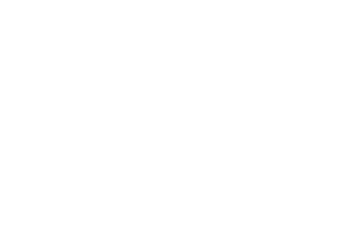

In [17]:
for name in ["happy", "neutral", "sad", "surprise"]:
    path = "images/train/" + name
    Path("new_images/images/train/"+name).mkdir(parents=True, exist_ok=True)
    files = os.listdir(path)
    for i in range(1, len(files)):
        filename = files[i]
        f = os.path.join(path, filename)

        get_landmarks(f, landmark_detector)

## Validation - Tang

images/validation/angry/29588.jpg
new_images/images/validation/angry/29588.png
images/validation/angry/11017.jpg
new_images/images/validation/angry/11017.png
images/validation/angry/35162.jpg
new_images/images/validation/angry/35162.png
images/validation/angry/4015.jpg
new_images/images/validation/angry/4015.png
images/validation/angry/22807.jpg
new_images/images/validation/angry/22807.png
images/validation/angry/15715.jpg


KeyboardInterrupt: 

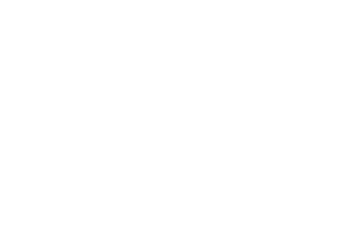

In [5]:
for name in ["angry", "fear", "happy", "neutral", "sad", "surprise"]:
    path = "images/validation/" + name
    Path("new_images/images/validation/"+name).mkdir(parents=True, exist_ok=True)
    files = os.listdir(path)
    for i in range(1, len(files)):
        filename = files[i]
        f = os.path.join(path, filename)

        get_landmarks(f, landmark_detector)

## Test - Nicole

new_images/images/test/angry\0.png
new_images/images/test/angry\1.png
new_images/images/test/angry\10.png
new_images/images/test/angry\1015.png
new_images/images/test/angry\1016.png
new_images/images/test/angry\1018.png
new_images/images/test/angry\1039.png
new_images/images/test/angry\1051.png
new_images/images/test/angry\1061.png
new_images/images/test/angry\1066.png
new_images/images/test/angry\107.png
new_images/images/test/angry\1090.png
new_images/images/test/angry\1098.png
new_images/images/test/angry\1102.png
new_images/images/test/angry\1105.png
new_images/images/test/angry\1108.png
new_images/images/test/angry\1122.png
new_images/images/test/angry\1123.png
new_images/images/test/angry\1147.png
new_images/images/test/angry\1150.png
new_images/images/test/angry\1158.png
new_images/images/test/angry\1160.png
new_images/images/test/angry\1166.png
new_images/images/test/angry\1168.png
new_images/images/test/angry\117.png
new_images/images/test/angry\1170.png
new_images/images/test

new_images/images/test/angry\2659.png
new_images/images/test/angry\2665.png
new_images/images/test/angry\2672.png
new_images/images/test/angry\2684.png
new_images/images/test/angry\2687.png
new_images/images/test/angry\2696.png
new_images/images/test/angry\27.png
new_images/images/test/angry\2708.png
new_images/images/test/angry\2711.png
new_images/images/test/angry\2743.png
new_images/images/test/angry\2749.png
new_images/images/test/angry\2764.png
new_images/images/test/angry\2778.png
new_images/images/test/angry\278.png
new_images/images/test/angry\2781.png
new_images/images/test/angry\280.png
new_images/images/test/angry\2814.png
new_images/images/test/angry\2818.png
new_images/images/test/angry\2823.png
new_images/images/test/angry\2826.png
new_images/images/test/angry\2830.png
new_images/images/test/angry\2836.png
new_images/images/test/angry\2843.png
new_images/images/test/angry\2847.png
new_images/images/test/angry\2859.png
new_images/images/test/angry\2881.png
new_images/image

new_images/images/test/angry\3102.png
new_images/images/test/angry\31028.png
new_images/images/test/angry\3103.png
new_images/images/test/angry\31031.png
new_images/images/test/angry\31044.png
new_images/images/test/angry\31045.png
new_images/images/test/angry\3105.png
new_images/images/test/angry\31064.png
new_images/images/test/angry\31069.png
new_images/images/test/angry\31077.png
new_images/images/test/angry\31088.png
new_images/images/test/angry\31098.png
new_images/images/test/angry\31100.png
new_images/images/test/angry\31103.png
new_images/images/test/angry\31108.png
new_images/images/test/angry\31120.png
new_images/images/test/angry\31125.png
new_images/images/test/angry\3113.png
new_images/images/test/angry\31151.png
new_images/images/test/angry\31152.png
new_images/images/test/angry\31153.png
new_images/images/test/angry\31154.png
new_images/images/test/angry\31162.png
new_images/images/test/angry\3119.png
new_images/images/test/angry\31193.png
new_images/images/test/angry\3

new_images/images/test/angry\5009.png
new_images/images/test/angry\5012.png
new_images/images/test/angry\5014.png
new_images/images/test/angry\5024.png
new_images/images/test/angry\5039.png
new_images/images/test/angry\5041.png
new_images/images/test/angry\5045.png
new_images/images/test/angry\5059.png
new_images/images/test/angry\5067.png
new_images/images/test/angry\5076.png
new_images/images/test/angry\509.png
new_images/images/test/angry\5092.png
new_images/images/test/angry\5094.png
new_images/images/test/angry\5096.png
new_images/images/test/angry\5104.png
new_images/images/test/angry\5118.png
new_images/images/test/angry\5129.png
new_images/images/test/angry\5130.png
new_images/images/test/angry\5132.png
new_images/images/test/angry\5134.png
new_images/images/test/angry\5140.png
new_images/images/test/angry\515.png
new_images/images/test/angry\516.png
new_images/images/test/angry\5162.png
new_images/images/test/angry\5187.png
new_images/images/test/angry\519.png
new_images/image

new_images/images/test/angry\6918.png
new_images/images/test/angry\6919.png
new_images/images/test/angry\6927.png
new_images/images/test/angry\6929.png
new_images/images/test/angry\6940.png
new_images/images/test/angry\6944.png
new_images/images/test/angry\6948.png
new_images/images/test/angry\6952.png
new_images/images/test/angry\6959.png
new_images/images/test/angry\700.png
new_images/images/test/angry\7004.png
new_images/images/test/angry\7007.png
new_images/images/test/angry\7011.png
new_images/images/test/angry\7019.png
new_images/images/test/angry\704.png
new_images/images/test/angry\7046.png
new_images/images/test/angry\7057.png
new_images/images/test/angry\7066.png
new_images/images/test/angry\7082.png
new_images/images/test/angry\7083.png
new_images/images/test/angry\7086.png
new_images/images/test/angry\7088.png
new_images/images/test/angry\7090.png
new_images/images/test/angry\7093.png
new_images/images/test/angry\7096.png
new_images/images/test/angry\7098.png
new_images/ima

new_images/images/test/fear\27874.png
new_images/images/test/fear\27896.png
new_images/images/test/fear\27934.png
new_images/images/test/fear\27935.png
new_images/images/test/fear\27941.png
new_images/images/test/fear\27960.png
new_images/images/test/fear\27968.png
new_images/images/test/fear\27984.png
new_images/images/test/fear\27987.png
new_images/images/test/fear\28001.png
new_images/images/test/fear\28003.png
new_images/images/test/fear\28011.png
new_images/images/test/fear\28012.png
new_images/images/test/fear\28019.png
new_images/images/test/fear\28022.png
new_images/images/test/fear\28024.png
new_images/images/test/fear\28036.png
new_images/images/test/fear\28037.png
new_images/images/test/fear\28038.png
new_images/images/test/fear\28052.png
new_images/images/test/fear\28059.png
new_images/images/test/fear\28070.png
new_images/images/test/fear\28095.png
new_images/images/test/fear\28097.png
new_images/images/test/fear\28098.png
new_images/images/test/fear\28106.png
new_images/i

new_images/images/test/fear\29726.png
new_images/images/test/fear\29736.png
new_images/images/test/fear\29753.png
new_images/images/test/fear\29762.png
new_images/images/test/fear\29777.png
new_images/images/test/fear\29784.png
new_images/images/test/fear\29793.png
new_images/images/test/fear\29812.png
new_images/images/test/fear\29813.png
new_images/images/test/fear\29827.png
new_images/images/test/fear\29839.png
new_images/images/test/fear\29846.png
new_images/images/test/fear\29870.png
new_images/images/test/fear\29879.png
new_images/images/test/fear\29880.png
new_images/images/test/fear\29883.png
new_images/images/test/fear\29887.png
new_images/images/test/fear\29888.png
new_images/images/test/fear\29899.png
new_images/images/test/fear\29906.png
new_images/images/test/fear\29908.png
new_images/images/test/fear\29911.png
new_images/images/test/fear\29918.png
new_images/images/test/fear\29923.png
new_images/images/test/fear\29925.png
new_images/images/test/fear\29935.png
new_images/i

new_images/images/test/fear\31842.png
new_images/images/test/fear\31844.png
new_images/images/test/fear\31862.png
new_images/images/test/fear\31864.png
new_images/images/test/fear\31885.png
new_images/images/test/fear\31904.png
new_images/images/test/fear\31914.png
new_images/images/test/fear\31919.png
new_images/images/test/fear\31920.png
new_images/images/test/fear\31944.png
new_images/images/test/fear\31959.png
new_images/images/test/fear\31965.png
new_images/images/test/fear\31982.png
new_images/images/test/fear\31989.png
new_images/images/test/fear\31991.png
new_images/images/test/fear\32000.png
new_images/images/test/fear\32007.png
new_images/images/test/fear\32014.png
new_images/images/test/fear\32018.png
new_images/images/test/fear\32050.png
new_images/images/test/fear\32052.png
new_images/images/test/fear\32053.png
new_images/images/test/fear\32058.png
new_images/images/test/fear\32059.png
new_images/images/test/fear\32074.png
new_images/images/test/fear\32088.png
new_images/i

new_images/images/test/fear\33788.png
new_images/images/test/fear\33790.png
new_images/images/test/fear\33801.png
new_images/images/test/fear\33804.png
new_images/images/test/fear\33805.png
new_images/images/test/fear\33812.png
new_images/images/test/fear\33823.png
new_images/images/test/fear\33830.png
new_images/images/test/fear\33837.png
new_images/images/test/fear\33850.png
new_images/images/test/fear\33887.png
new_images/images/test/fear\33904.png
new_images/images/test/fear\33909.png
new_images/images/test/fear\33913.png
new_images/images/test/fear\33921.png
new_images/images/test/fear\33945.png
new_images/images/test/fear\33957.png
new_images/images/test/fear\33958.png
new_images/images/test/fear\33961.png
new_images/images/test/fear\33971.png
new_images/images/test/fear\33979.png
new_images/images/test/fear\33985.png
new_images/images/test/fear\34000.png
new_images/images/test/fear\34005.png
new_images/images/test/fear\34011.png
new_images/images/test/fear\34020.png
new_images/i

new_images/images/test/fear\35694.png
new_images/images/test/fear\35702.png
new_images/images/test/fear\35708.png
new_images/images/test/fear\35710.png
new_images/images/test/fear\35711.png
new_images/images/test/fear\35720.png
new_images/images/test/fear\35726.png
new_images/images/test/fear\35730.png
new_images/images/test/fear\35735.png
new_images/images/test/fear\35740.png
new_images/images/test/fear\35743.png
new_images/images/test/fear\35744.png
new_images/images/test/fear\35760.png
new_images/images/test/fear\35763.png
new_images/images/test/fear\35773.png
new_images/images/test/fear\35783.png
new_images/images/test/fear\35791.png
new_images/images/test/fear\35826.png
new_images/images/test/fear\35832.png
new_images/images/test/fear\35835.png
new_images/images/test/fear\35838.png
new_images/images/test/fear\35848.png
new_images/images/test/fear\35862.png
new_images/images/test/fear\35868.png
new_images/images/test/fear\35870.png
new_images/images/test/fear\35879.png
new_images/i

new_images/images/test/happy\27579.png
new_images/images/test/happy\27584.png
new_images/images/test/happy\27587.png
new_images/images/test/happy\27589.png
new_images/images/test/happy\27599.png
new_images/images/test/happy\27601.png
new_images/images/test/happy\27603.png
new_images/images/test/happy\27605.png
new_images/images/test/happy\27606.png
new_images/images/test/happy\27610.png
new_images/images/test/happy\27611.png
new_images/images/test/happy\27615.png
new_images/images/test/happy\27618.png
new_images/images/test/happy\27634.png
new_images/images/test/happy\27637.png
new_images/images/test/happy\27638.png
new_images/images/test/happy\27640.png
new_images/images/test/happy\27643.png
new_images/images/test/happy\27661.png
new_images/images/test/happy\27663.png
new_images/images/test/happy\27669.png
new_images/images/test/happy\27672.png
new_images/images/test/happy\27676.png
new_images/images/test/happy\27680.png
new_images/images/test/happy\27693.png
new_images/images/test/ha

new_images/images/test/happy\28728.png
new_images/images/test/happy\28739.png
new_images/images/test/happy\28741.png
new_images/images/test/happy\28748.png
new_images/images/test/happy\28754.png
new_images/images/test/happy\28756.png
new_images/images/test/happy\28760.png
new_images/images/test/happy\28764.png
new_images/images/test/happy\28768.png
new_images/images/test/happy\28770.png
new_images/images/test/happy\28774.png
new_images/images/test/happy\28792.png
new_images/images/test/happy\28795.png
new_images/images/test/happy\28796.png
new_images/images/test/happy\28798.png
new_images/images/test/happy\28805.png
new_images/images/test/happy\28806.png
new_images/images/test/happy\28809.png
new_images/images/test/happy\28812.png
new_images/images/test/happy\28818.png
new_images/images/test/happy\28819.png
new_images/images/test/happy\28823.png
new_images/images/test/happy\28825.png
new_images/images/test/happy\28835.png
new_images/images/test/happy\28850.png
new_images/images/test/ha

new_images/images/test/happy\29903.png
new_images/images/test/happy\29905.png
new_images/images/test/happy\29907.png
new_images/images/test/happy\29910.png
new_images/images/test/happy\29917.png
new_images/images/test/happy\29926.png
new_images/images/test/happy\29930.png
new_images/images/test/happy\29932.png
new_images/images/test/happy\29934.png
new_images/images/test/happy\29938.png
new_images/images/test/happy\29940.png
new_images/images/test/happy\29945.png
new_images/images/test/happy\29946.png
new_images/images/test/happy\29958.png
new_images/images/test/happy\29959.png
new_images/images/test/happy\29961.png
new_images/images/test/happy\29965.png
new_images/images/test/happy\29967.png
new_images/images/test/happy\29974.png
new_images/images/test/happy\29975.png
new_images/images/test/happy\29988.png
new_images/images/test/happy\29992.png
new_images/images/test/happy\29993.png
new_images/images/test/happy\29995.png
new_images/images/test/happy\29999.png
new_images/images/test/ha

new_images/images/test/happy\30942.png
new_images/images/test/happy\30955.png
new_images/images/test/happy\30960.png
new_images/images/test/happy\30970.png
new_images/images/test/happy\30974.png
new_images/images/test/happy\30975.png
new_images/images/test/happy\30979.png
new_images/images/test/happy\30984.png
new_images/images/test/happy\30986.png
new_images/images/test/happy\30995.png
new_images/images/test/happy\30999.png
new_images/images/test/happy\31000.png
new_images/images/test/happy\31001.png
new_images/images/test/happy\31003.png
new_images/images/test/happy\31006.png
new_images/images/test/happy\31011.png
new_images/images/test/happy\31012.png
new_images/images/test/happy\31016.png
new_images/images/test/happy\31017.png
new_images/images/test/happy\31018.png
new_images/images/test/happy\31020.png
new_images/images/test/happy\31022.png
new_images/images/test/happy\31024.png
new_images/images/test/happy\31027.png
new_images/images/test/happy\31035.png
new_images/images/test/ha

new_images/images/test/happy\31951.png
new_images/images/test/happy\31958.png
new_images/images/test/happy\31962.png
new_images/images/test/happy\31964.png
new_images/images/test/happy\31966.png
new_images/images/test/happy\31972.png
new_images/images/test/happy\31985.png
new_images/images/test/happy\31990.png
new_images/images/test/happy\32003.png
new_images/images/test/happy\32011.png
new_images/images/test/happy\32012.png
new_images/images/test/happy\32013.png
new_images/images/test/happy\32021.png
new_images/images/test/happy\32022.png
new_images/images/test/happy\32027.png
new_images/images/test/happy\32036.png
new_images/images/test/happy\32037.png
new_images/images/test/happy\32039.png
new_images/images/test/happy\32041.png
new_images/images/test/happy\32043.png
new_images/images/test/happy\32055.png
new_images/images/test/happy\32062.png
new_images/images/test/happy\32063.png
new_images/images/test/happy\32066.png
new_images/images/test/happy\32068.png
new_images/images/test/ha

new_images/images/test/happy\33032.png
new_images/images/test/happy\33043.png
new_images/images/test/happy\33057.png
new_images/images/test/happy\33068.png
new_images/images/test/happy\33074.png
new_images/images/test/happy\33078.png
new_images/images/test/happy\33087.png
new_images/images/test/happy\33092.png
new_images/images/test/happy\33093.png
new_images/images/test/happy\33099.png
new_images/images/test/happy\33101.png
new_images/images/test/happy\33102.png
new_images/images/test/happy\33104.png
new_images/images/test/happy\33107.png
new_images/images/test/happy\33116.png
new_images/images/test/happy\33119.png
new_images/images/test/happy\33122.png
new_images/images/test/happy\33123.png
new_images/images/test/happy\33125.png
new_images/images/test/happy\33126.png
new_images/images/test/happy\33134.png
new_images/images/test/happy\33135.png
new_images/images/test/happy\33138.png
new_images/images/test/happy\33146.png
new_images/images/test/happy\33151.png
new_images/images/test/ha

new_images/images/test/happy\34186.png
new_images/images/test/happy\34188.png
new_images/images/test/happy\34196.png
new_images/images/test/happy\34198.png
new_images/images/test/happy\34202.png
new_images/images/test/happy\34203.png
new_images/images/test/happy\34206.png
new_images/images/test/happy\34209.png
new_images/images/test/happy\34211.png
new_images/images/test/happy\34214.png
new_images/images/test/happy\34215.png
new_images/images/test/happy\34216.png
new_images/images/test/happy\34243.png
new_images/images/test/happy\34245.png
new_images/images/test/happy\34248.png
new_images/images/test/happy\34255.png
new_images/images/test/happy\34260.png
new_images/images/test/happy\34264.png
new_images/images/test/happy\34265.png
new_images/images/test/happy\34274.png
new_images/images/test/happy\34280.png
new_images/images/test/happy\34281.png
new_images/images/test/happy\34282.png
new_images/images/test/happy\34293.png
new_images/images/test/happy\34294.png
new_images/images/test/ha

new_images/images/test/happy\35180.png
new_images/images/test/happy\35181.png
new_images/images/test/happy\35182.png
new_images/images/test/happy\35197.png
new_images/images/test/happy\35205.png
new_images/images/test/happy\35213.png
new_images/images/test/happy\35215.png
new_images/images/test/happy\35218.png
new_images/images/test/happy\35222.png
new_images/images/test/happy\35225.png
new_images/images/test/happy\35239.png
new_images/images/test/happy\35242.png
new_images/images/test/happy\35252.png
new_images/images/test/happy\35253.png
new_images/images/test/happy\35256.png
new_images/images/test/happy\35258.png
new_images/images/test/happy\35265.png
new_images/images/test/happy\35275.png
new_images/images/test/happy\35283.png
new_images/images/test/happy\35287.png
new_images/images/test/happy\35293.png
new_images/images/test/happy\35295.png
new_images/images/test/happy\35299.png
new_images/images/test/happy\35301.png
new_images/images/test/happy\35304.png
new_images/images/test/ha

new_images/images/test/neutral\27689.png
new_images/images/test/neutral\27697.png
new_images/images/test/neutral\27706.png
new_images/images/test/neutral\27707.png
new_images/images/test/neutral\27736.png
new_images/images/test/neutral\27742.png
new_images/images/test/neutral\27745.png
new_images/images/test/neutral\27748.png
new_images/images/test/neutral\27787.png
new_images/images/test/neutral\27793.png
new_images/images/test/neutral\27802.png
new_images/images/test/neutral\27814.png
new_images/images/test/neutral\27826.png
new_images/images/test/neutral\27827.png
new_images/images/test/neutral\27834.png
new_images/images/test/neutral\27835.png
new_images/images/test/neutral\27837.png
new_images/images/test/neutral\27860.png
new_images/images/test/neutral\27867.png
new_images/images/test/neutral\27882.png
new_images/images/test/neutral\27885.png
new_images/images/test/neutral\27893.png
new_images/images/test/neutral\27895.png
new_images/images/test/neutral\27911.png
new_images/image

new_images/images/test/neutral\29125.png
new_images/images/test/neutral\29133.png
new_images/images/test/neutral\29142.png
new_images/images/test/neutral\29144.png
new_images/images/test/neutral\29145.png
new_images/images/test/neutral\29151.png
new_images/images/test/neutral\29161.png
new_images/images/test/neutral\29168.png
new_images/images/test/neutral\29173.png
new_images/images/test/neutral\29176.png
new_images/images/test/neutral\29181.png
new_images/images/test/neutral\29182.png
new_images/images/test/neutral\29183.png
new_images/images/test/neutral\29186.png
new_images/images/test/neutral\29190.png
new_images/images/test/neutral\29193.png
new_images/images/test/neutral\29195.png
new_images/images/test/neutral\29198.png
new_images/images/test/neutral\29209.png
new_images/images/test/neutral\29230.png
new_images/images/test/neutral\29232.png
new_images/images/test/neutral\29244.png
new_images/images/test/neutral\29245.png
new_images/images/test/neutral\29250.png
new_images/image

new_images/images/test/neutral\30454.png
new_images/images/test/neutral\30457.png
new_images/images/test/neutral\30472.png
new_images/images/test/neutral\30474.png
new_images/images/test/neutral\30481.png
new_images/images/test/neutral\30483.png
new_images/images/test/neutral\30485.png
new_images/images/test/neutral\30488.png
new_images/images/test/neutral\30510.png
new_images/images/test/neutral\30512.png
new_images/images/test/neutral\30515.png
new_images/images/test/neutral\30522.png
new_images/images/test/neutral\30527.png
new_images/images/test/neutral\30528.png
new_images/images/test/neutral\30534.png
new_images/images/test/neutral\30539.png
new_images/images/test/neutral\30547.png
new_images/images/test/neutral\30551.png
new_images/images/test/neutral\30553.png
new_images/images/test/neutral\30559.png
new_images/images/test/neutral\30561.png
new_images/images/test/neutral\30566.png
new_images/images/test/neutral\30583.png
new_images/images/test/neutral\30600.png
new_images/image

new_images/images/test/neutral\31960.png
new_images/images/test/neutral\31963.png
new_images/images/test/neutral\31970.png
new_images/images/test/neutral\31974.png
new_images/images/test/neutral\31981.png
new_images/images/test/neutral\31986.png
new_images/images/test/neutral\31993.png
new_images/images/test/neutral\31994.png
new_images/images/test/neutral\31996.png
new_images/images/test/neutral\31999.png
new_images/images/test/neutral\32008.png
new_images/images/test/neutral\32009.png
new_images/images/test/neutral\32016.png
new_images/images/test/neutral\32020.png
new_images/images/test/neutral\32028.png
new_images/images/test/neutral\32032.png
new_images/images/test/neutral\32033.png
new_images/images/test/neutral\32034.png
new_images/images/test/neutral\32049.png
new_images/images/test/neutral\32073.png
new_images/images/test/neutral\32082.png
new_images/images/test/neutral\32090.png
new_images/images/test/neutral\32101.png
new_images/images/test/neutral\32106.png
new_images/image

new_images/images/test/neutral\33403.png
new_images/images/test/neutral\33404.png
new_images/images/test/neutral\33414.png
new_images/images/test/neutral\33416.png
new_images/images/test/neutral\33418.png
new_images/images/test/neutral\33424.png
new_images/images/test/neutral\33428.png
new_images/images/test/neutral\33435.png
new_images/images/test/neutral\33437.png
new_images/images/test/neutral\33462.png
new_images/images/test/neutral\33482.png
new_images/images/test/neutral\33487.png
new_images/images/test/neutral\33489.png
new_images/images/test/neutral\33495.png
new_images/images/test/neutral\33503.png
new_images/images/test/neutral\33521.png
new_images/images/test/neutral\33537.png
new_images/images/test/neutral\33563.png
new_images/images/test/neutral\33566.png
new_images/images/test/neutral\33572.png
new_images/images/test/neutral\33578.png
new_images/images/test/neutral\33584.png
new_images/images/test/neutral\33586.png
new_images/images/test/neutral\33590.png
new_images/image

new_images/images/test/neutral\34831.png
new_images/images/test/neutral\34851.png
new_images/images/test/neutral\34856.png
new_images/images/test/neutral\34885.png
new_images/images/test/neutral\34886.png
new_images/images/test/neutral\34903.png
new_images/images/test/neutral\34906.png
new_images/images/test/neutral\34910.png
new_images/images/test/neutral\34911.png
new_images/images/test/neutral\34915.png
new_images/images/test/neutral\34924.png
new_images/images/test/neutral\34930.png
new_images/images/test/neutral\34932.png
new_images/images/test/neutral\34935.png
new_images/images/test/neutral\34937.png
new_images/images/test/neutral\34962.png
new_images/images/test/neutral\34977.png
new_images/images/test/neutral\34980.png
new_images/images/test/neutral\34981.png
new_images/images/test/neutral\34992.png
new_images/images/test/neutral\34993.png
new_images/images/test/neutral\34994.png
new_images/images/test/neutral\35004.png
new_images/images/test/neutral\35014.png
new_images/image

new_images/images/test/sad\27794.png
new_images/images/test/sad\27795.png
new_images/images/test/sad\27799.png
new_images/images/test/sad\27800.png
new_images/images/test/sad\27815.png
new_images/images/test/sad\27816.png
new_images/images/test/sad\27822.png
new_images/images/test/sad\27833.png
new_images/images/test/sad\27836.png
new_images/images/test/sad\27841.png
new_images/images/test/sad\27848.png
new_images/images/test/sad\27849.png
new_images/images/test/sad\27857.png
new_images/images/test/sad\27862.png
new_images/images/test/sad\27891.png
new_images/images/test/sad\27905.png
new_images/images/test/sad\27912.png
new_images/images/test/sad\27914.png
new_images/images/test/sad\27922.png
new_images/images/test/sad\27943.png
new_images/images/test/sad\27951.png
new_images/images/test/sad\27956.png
new_images/images/test/sad\27974.png
new_images/images/test/sad\27976.png
new_images/images/test/sad\27986.png
new_images/images/test/sad\28018.png
new_images/images/test/sad\28021.png
n

new_images/images/test/sad\29518.png
new_images/images/test/sad\29521.png
new_images/images/test/sad\29524.png
new_images/images/test/sad\29531.png
new_images/images/test/sad\29538.png
new_images/images/test/sad\29546.png
new_images/images/test/sad\29550.png
new_images/images/test/sad\29552.png
new_images/images/test/sad\29560.png
new_images/images/test/sad\29565.png
new_images/images/test/sad\29569.png
new_images/images/test/sad\29573.png
new_images/images/test/sad\29576.png
new_images/images/test/sad\29583.png
new_images/images/test/sad\29584.png
new_images/images/test/sad\29594.png
new_images/images/test/sad\29597.png
new_images/images/test/sad\29602.png
new_images/images/test/sad\29620.png
new_images/images/test/sad\29623.png
new_images/images/test/sad\29625.png
new_images/images/test/sad\29633.png
new_images/images/test/sad\29635.png
new_images/images/test/sad\29638.png
new_images/images/test/sad\29642.png
new_images/images/test/sad\29644.png
new_images/images/test/sad\29654.png
n

new_images/images/test/sad\31143.png
new_images/images/test/sad\31156.png
new_images/images/test/sad\31158.png
new_images/images/test/sad\31161.png
new_images/images/test/sad\31166.png
new_images/images/test/sad\31168.png
new_images/images/test/sad\31174.png
new_images/images/test/sad\31175.png
new_images/images/test/sad\31182.png
new_images/images/test/sad\31183.png
new_images/images/test/sad\31186.png
new_images/images/test/sad\31190.png
new_images/images/test/sad\31191.png
new_images/images/test/sad\31197.png
new_images/images/test/sad\31216.png
new_images/images/test/sad\31217.png
new_images/images/test/sad\31218.png
new_images/images/test/sad\31220.png
new_images/images/test/sad\31225.png
new_images/images/test/sad\31227.png
new_images/images/test/sad\31237.png
new_images/images/test/sad\31249.png
new_images/images/test/sad\31267.png
new_images/images/test/sad\31272.png
new_images/images/test/sad\31277.png
new_images/images/test/sad\31281.png
new_images/images/test/sad\31283.png
n

new_images/images/test/sad\32424.png
new_images/images/test/sad\32441.png
new_images/images/test/sad\32446.png
new_images/images/test/sad\32458.png
new_images/images/test/sad\32472.png
new_images/images/test/sad\32478.png
new_images/images/test/sad\32486.png
new_images/images/test/sad\32499.png
new_images/images/test/sad\32501.png
new_images/images/test/sad\32502.png
new_images/images/test/sad\32522.png
new_images/images/test/sad\32539.png
new_images/images/test/sad\32545.png
new_images/images/test/sad\32548.png
new_images/images/test/sad\32552.png
new_images/images/test/sad\32562.png
new_images/images/test/sad\32571.png
new_images/images/test/sad\32572.png
new_images/images/test/sad\32579.png
new_images/images/test/sad\32583.png
new_images/images/test/sad\32589.png
new_images/images/test/sad\32591.png
new_images/images/test/sad\32592.png
new_images/images/test/sad\32602.png
new_images/images/test/sad\32604.png
new_images/images/test/sad\32612.png
new_images/images/test/sad\32616.png
n

new_images/images/test/sad\34060.png
new_images/images/test/sad\34067.png
new_images/images/test/sad\34076.png
new_images/images/test/sad\34078.png
new_images/images/test/sad\34089.png
new_images/images/test/sad\34090.png
new_images/images/test/sad\34095.png
new_images/images/test/sad\34105.png
new_images/images/test/sad\34127.png
new_images/images/test/sad\34135.png
new_images/images/test/sad\34137.png
new_images/images/test/sad\34153.png
new_images/images/test/sad\34154.png
new_images/images/test/sad\34164.png
new_images/images/test/sad\34165.png
new_images/images/test/sad\34190.png
new_images/images/test/sad\34192.png
new_images/images/test/sad\34194.png
new_images/images/test/sad\34197.png
new_images/images/test/sad\34221.png
new_images/images/test/sad\34224.png
new_images/images/test/sad\34233.png
new_images/images/test/sad\34246.png
new_images/images/test/sad\34247.png
new_images/images/test/sad\34251.png
new_images/images/test/sad\34254.png
new_images/images/test/sad\34256.png
n

new_images/images/test/sad\35714.png
new_images/images/test/sad\35718.png
new_images/images/test/sad\35725.png
new_images/images/test/sad\35734.png
new_images/images/test/sad\35742.png
new_images/images/test/sad\35745.png
new_images/images/test/sad\35746.png
new_images/images/test/sad\35756.png
new_images/images/test/sad\35782.png
new_images/images/test/sad\35784.png
new_images/images/test/sad\35793.png
new_images/images/test/sad\35806.png
new_images/images/test/sad\35813.png
new_images/images/test/sad\35825.png
new_images/images/test/sad\35834.png
new_images/images/test/sad\35853.png
new_images/images/test/sad\35855.png
new_images/images/test/sad\35858.png
new_images/images/test/sad\35859.png
new_images/images/test/sad\35864.png
new_images/images/test/surprise\33483.png
new_images/images/test/surprise\33484.png
new_images/images/test/surprise\33500.png
new_images/images/test/surprise\33501.png
new_images/images/test/surprise\33511.png
new_images/images/test/surprise\33536.png
new_imag

new_images/images/test/surprise\35570.png
new_images/images/test/surprise\35586.png
new_images/images/test/surprise\35601.png
new_images/images/test/surprise\35616.png
new_images/images/test/surprise\35617.png
new_images/images/test/surprise\35622.png
new_images/images/test/surprise\35636.png
new_images/images/test/surprise\35662.png
new_images/images/test/surprise\35666.png
new_images/images/test/surprise\35678.png
new_images/images/test/surprise\35687.png
new_images/images/test/surprise\35695.png
new_images/images/test/surprise\35712.png
new_images/images/test/surprise\35738.png
new_images/images/test/surprise\35750.png
new_images/images/test/surprise\35772.png
new_images/images/test/surprise\35785.png
new_images/images/test/surprise\35796.png
new_images/images/test/surprise\35798.png
new_images/images/test/surprise\35815.png
new_images/images/test/surprise\35818.png
new_images/images/test/surprise\35824.png
new_images/images/test/surprise\35829.png
new_images/images/test/surprise\35

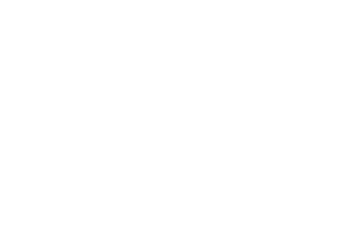

In [11]:
for name in ["angry", "fear", "happy", "neutral", "sad", "surprise"]:
    path = "images/test/" + name
    Path("new_images/images/test/"+name).mkdir(parents=True, exist_ok=True)
    files = os.listdir(path)
    for i in range(1, len(files)):
        filename = files[i]
        f = os.path.join(path, filename)

        get_landmarks(f, landmark_detector)